In [1]:
import seml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('vgg16', to_data_frame=True)

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
result_cols = [col for col in results.columns if col.startswith("result")]

In [4]:
results = results.groupby(['config.arguments.train_scheme', 'config.arguments.prune_criterion', 
                           'config.arguments.pruning_limit',
                          #'config.arguments.seed'
                          ])[
    result_cols
].agg('mean')

In [5]:
results

result.train_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit                     
DefaultTrainer                EarlyJohn                        0.70                                    0.973958   
                                                               0.80                                    0.963542   
                                                               0.90                                    0.958333   
                                                               0.98                                    0.989583   
                              EmptyCrit                        0.93                                    0.956250   
                              SNAPit                           0.93                                    0.900000   
                              SNAPitDuring                     0.93                                    0.953125   
                              SNIPitDuring                     0.70                                    0.984375   
                              StructuredEFGit                  0.90                                    0.937500   

                                                                                               result.test_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit                    
DefaultTrainer                EarlyJohn                        0.70                                   0.860271   
                                                               0.80                                   0.842688   
                                                               0.90                                   0.856721   
                                                               0.98                                   0.844082   
                              EmptyCrit                        0.93                                   0.853762   
                              SNAPit                           0.93                                   0.800955   
                              SNAPitDuring                     0.93                                   0.841919   
                              SNIPitDuring                     0.70                                   0.872512   
                              StructuredEFGit                  0.90                                   0.846278   

                                                                                               result.sparsity  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit                    
DefaultTrainer                EarlyJohn                        0.70                               6.998215e-01   
                                                               0.80                               7.997960e-01   
                                                               0.90                               8.997704e-01   
                                                               0.98                               9.797500e-01   
                              EmptyCrit                        0.93                               2.367888e-08   
                              SNAPit                           0.93                               9.949382e-01   
                              SNAPitDuring                     0.93                               9.943660e-01   
                              SNIPitDuring                     0.70                               7.358558e-01   
                              StructuredEFGit                  0.90                               9.846877e-01   

                                                                                               result.success_rate_FGSM_4  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit                               
DefaultTrainer                EarlyJohn                        0.70  

In [6]:
results = results.reset_index()

In [7]:
criterions = np.delete(np.unique(results["config.arguments.prune_criterion"]), np.where(np.unique(results["config.arguments.prune_criterion"]) == "EmptyCrit"))

In [8]:
criterions

array(['EarlyJohn', 'SNAPit', 'SNAPitDuring', 'SNIPitDuring',
       'StructuredEFGit'], dtype=object)

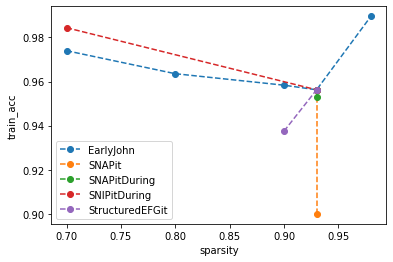

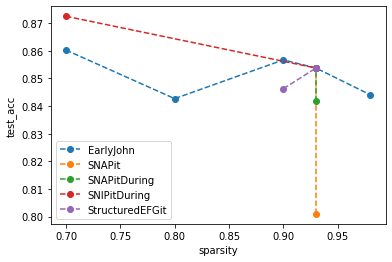

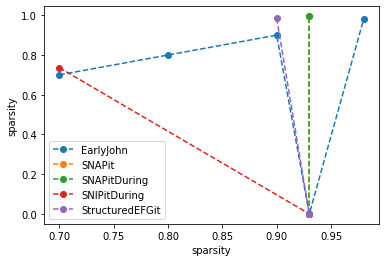

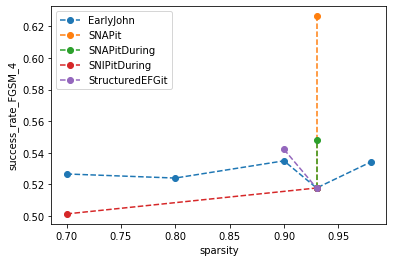

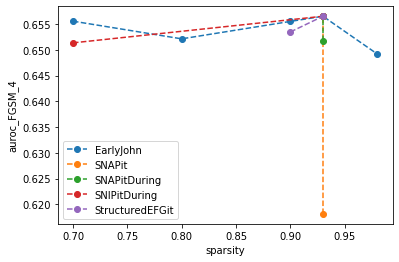

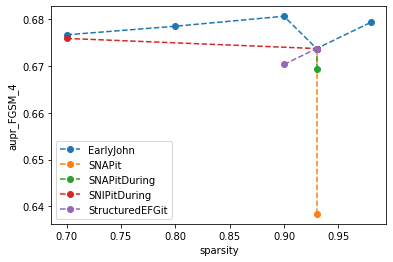

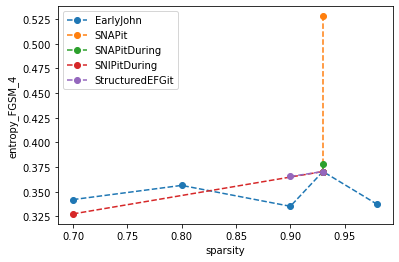

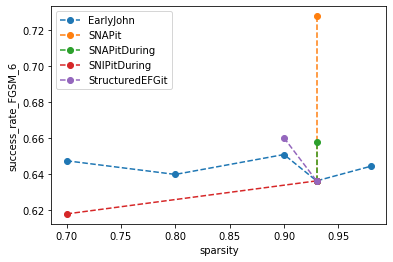

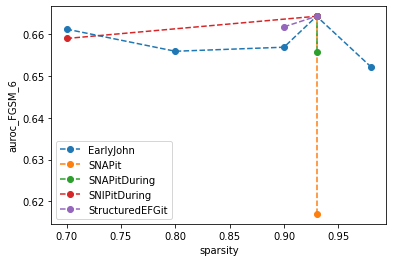

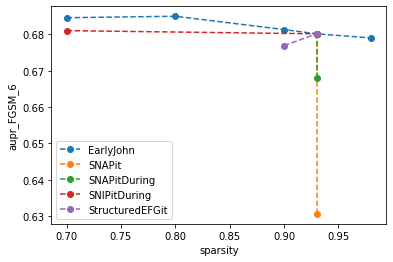

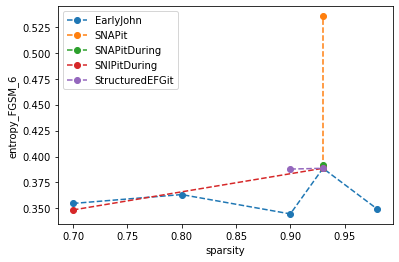

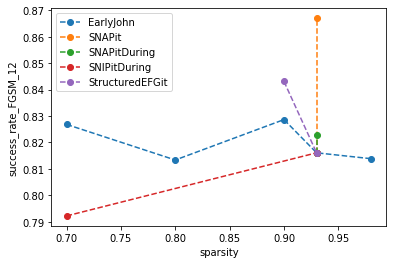

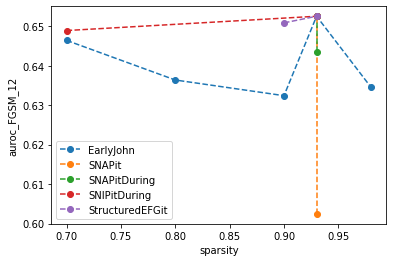

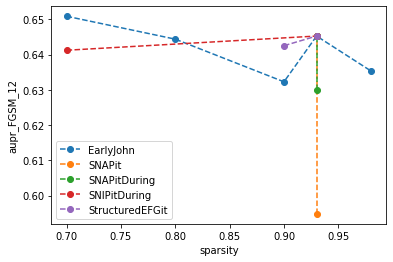

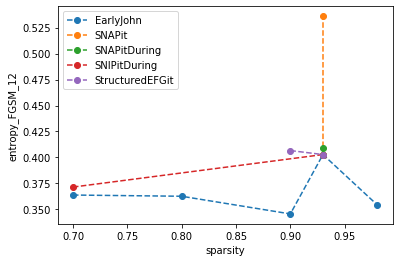

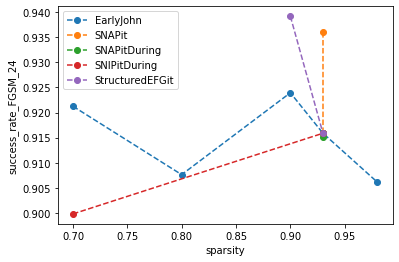

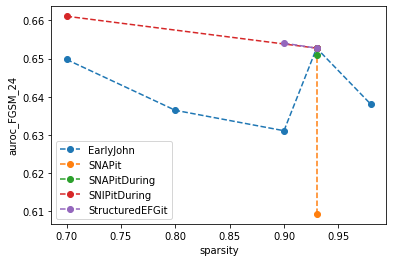

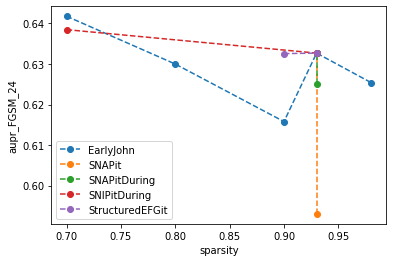

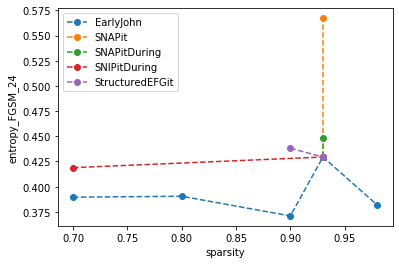

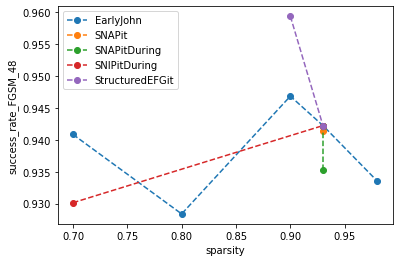

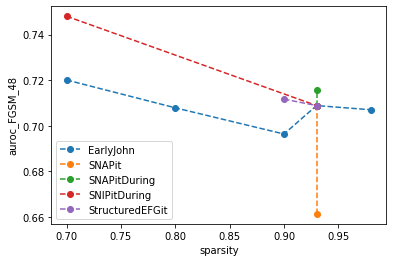

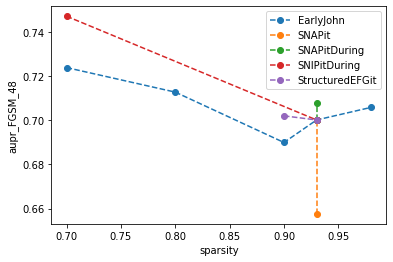

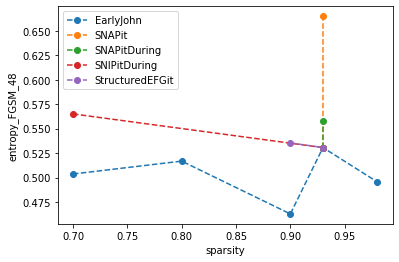

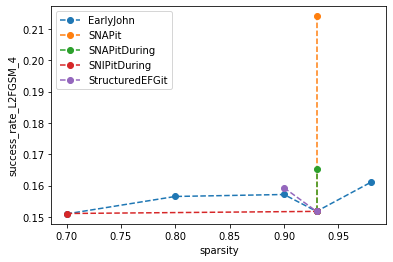

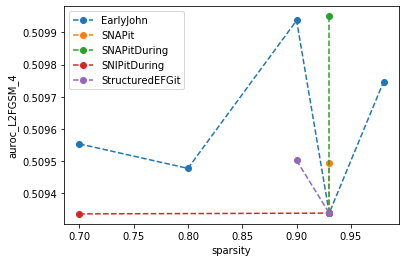

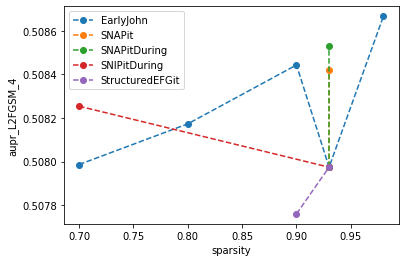

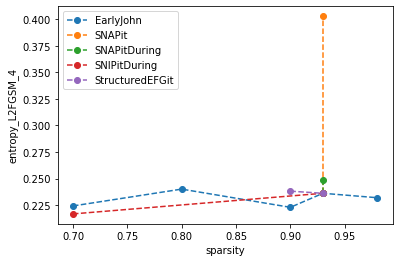

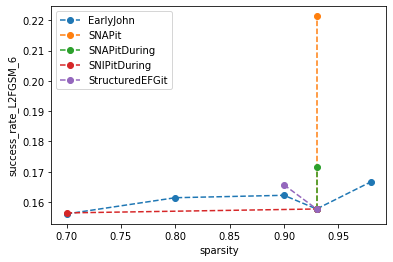

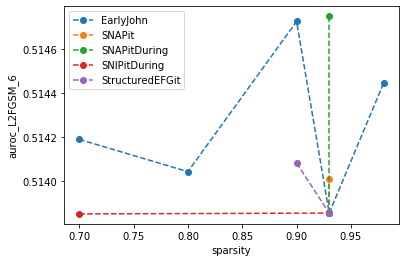

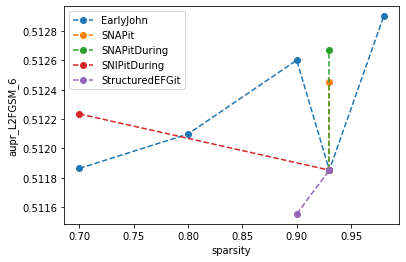

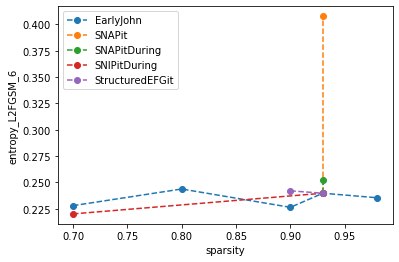

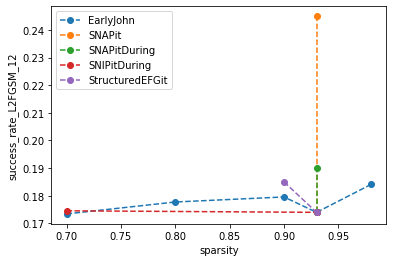

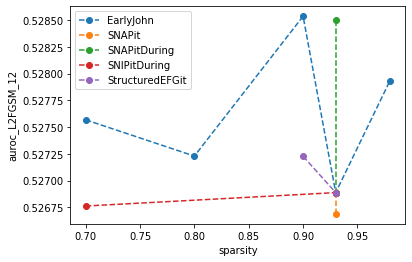

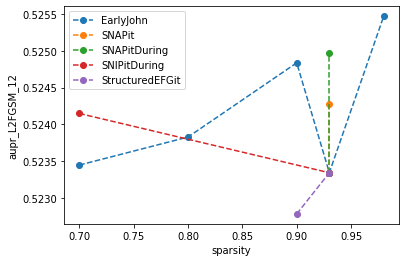

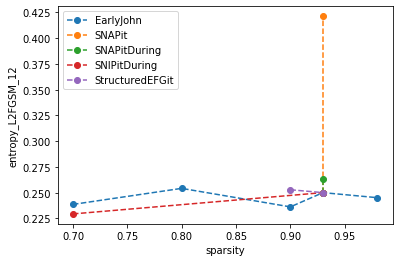

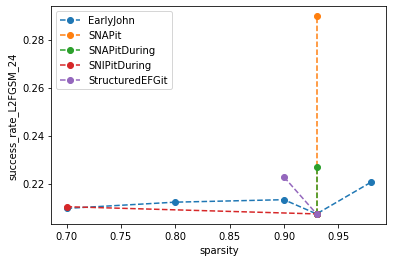

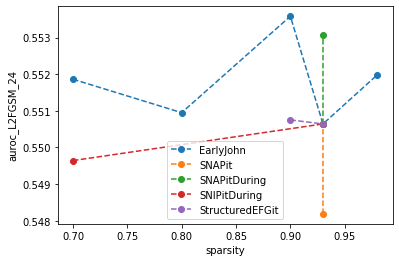

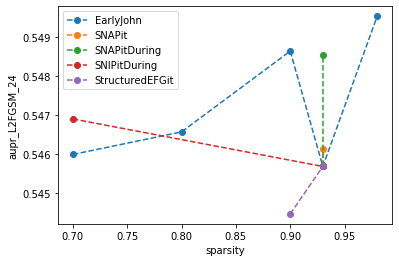

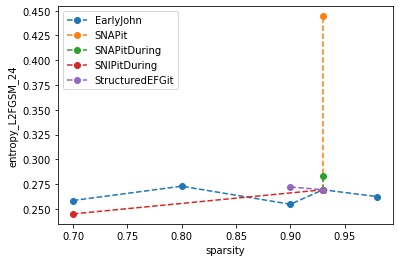

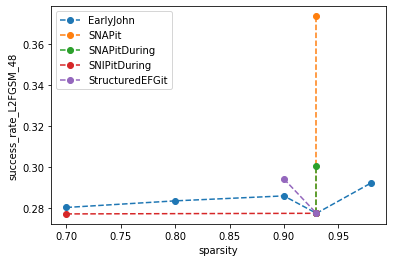

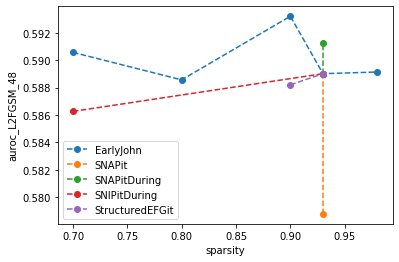

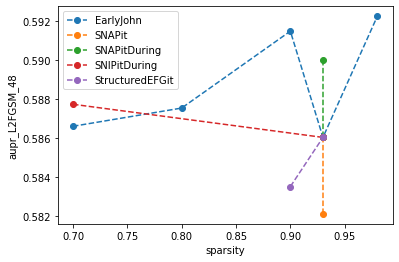

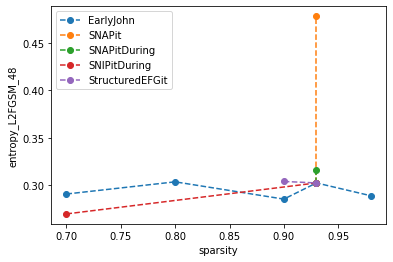

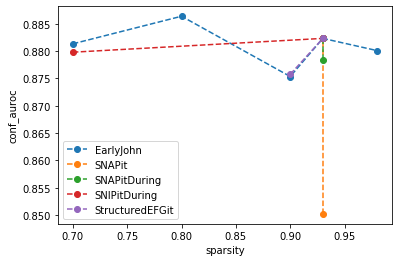

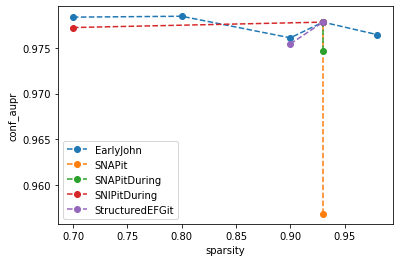

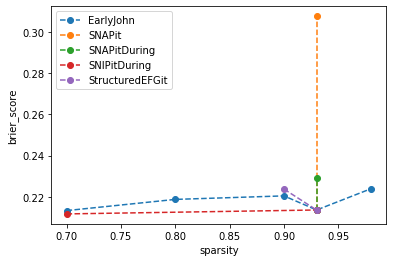

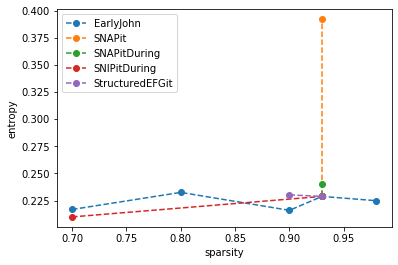

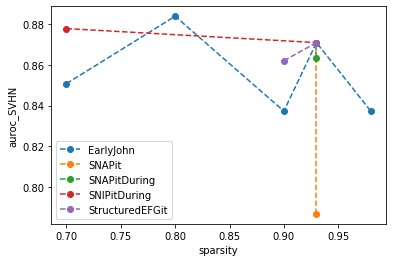

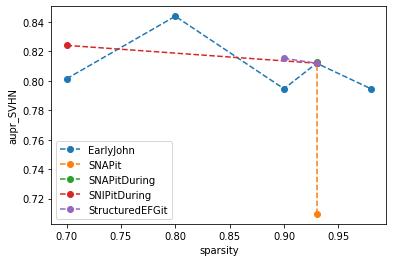

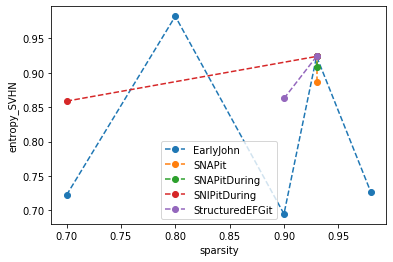

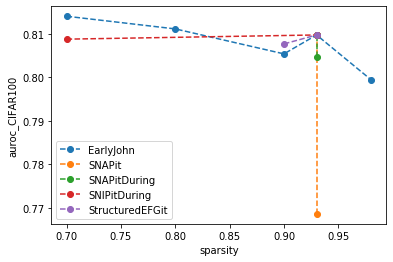

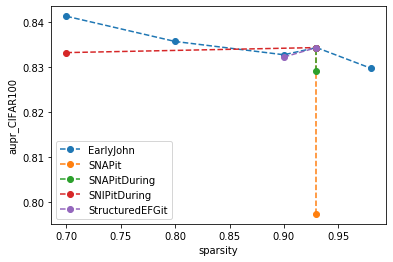

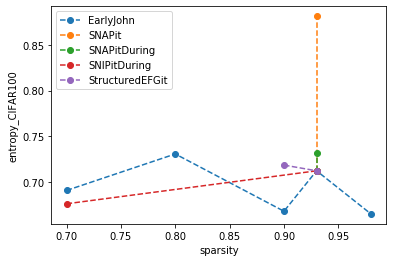

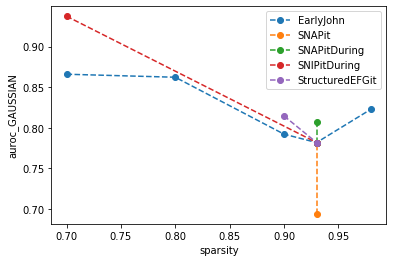

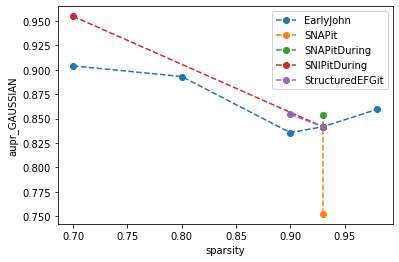

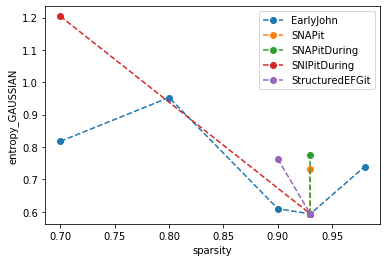

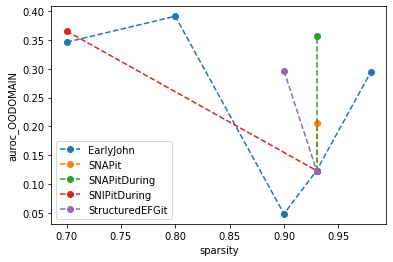

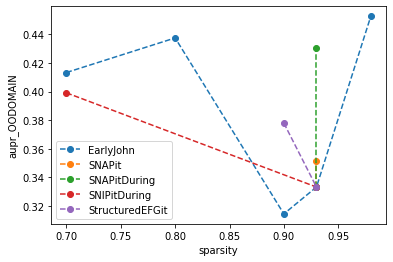

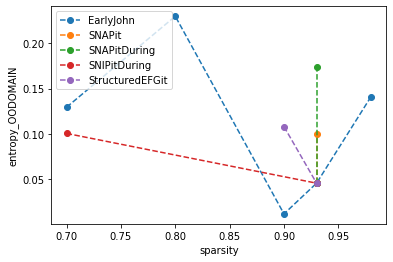

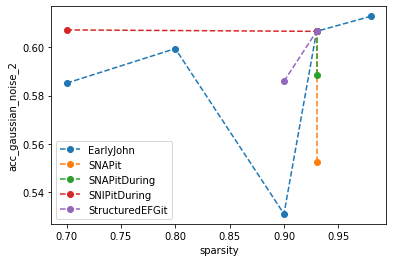

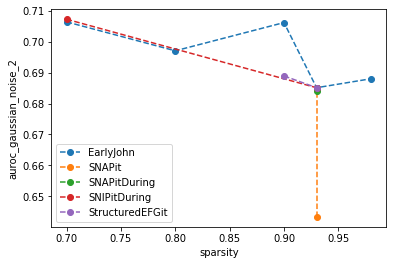

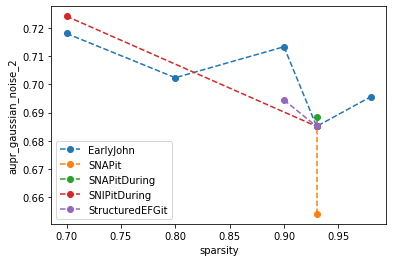

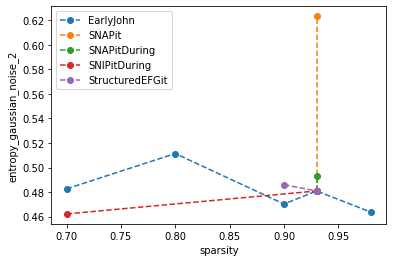

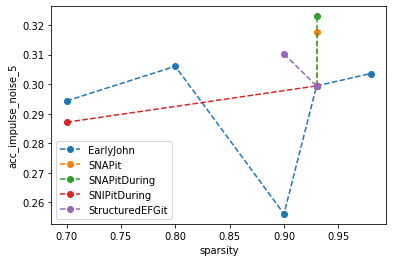

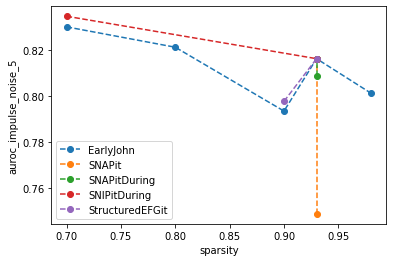

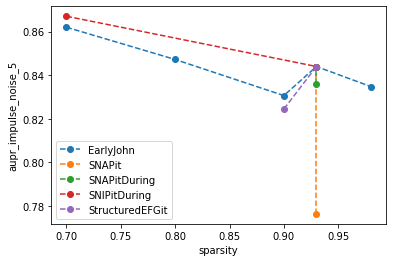

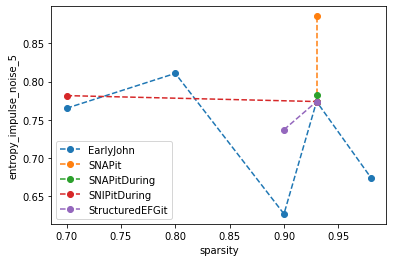

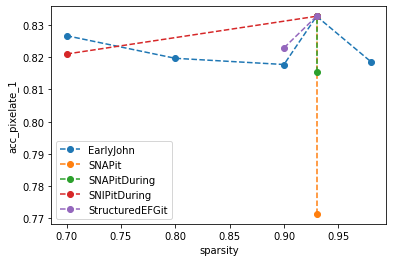

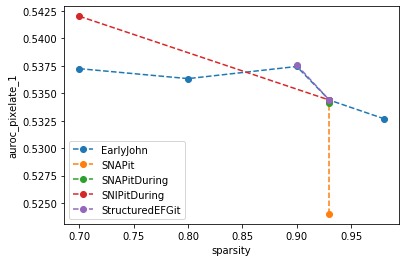

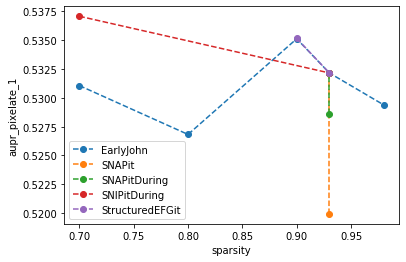

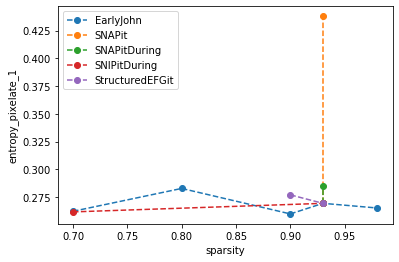

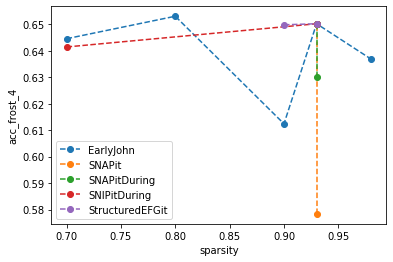

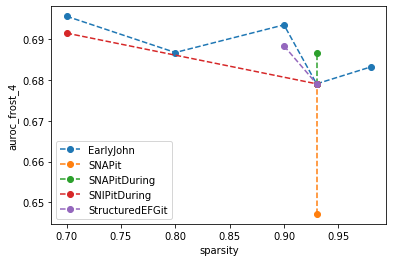

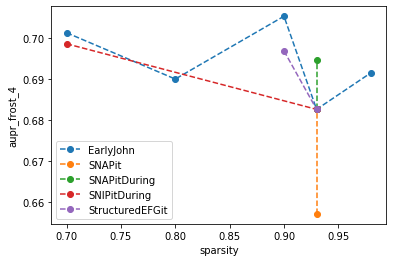

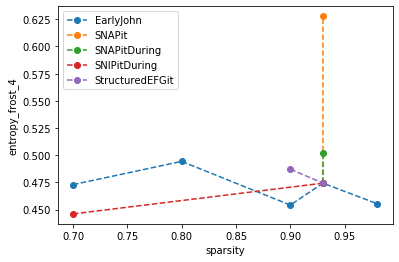

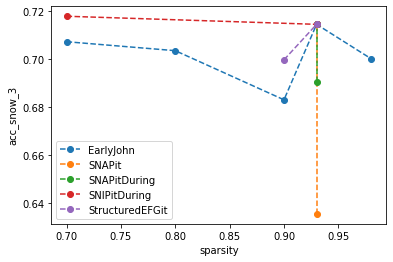

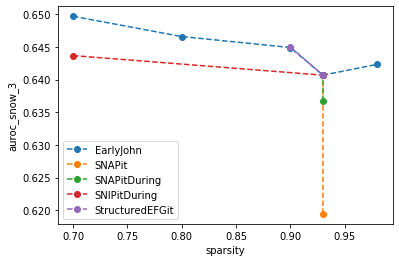

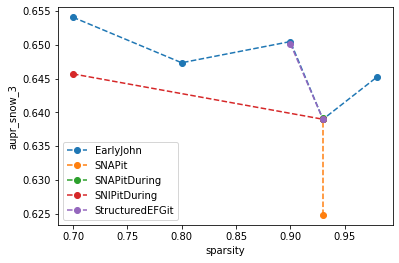

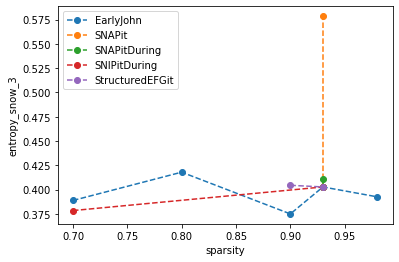

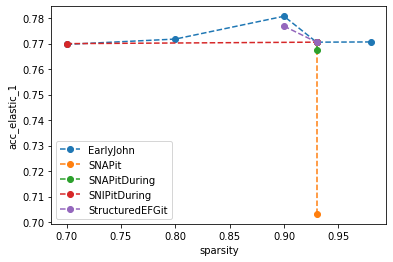

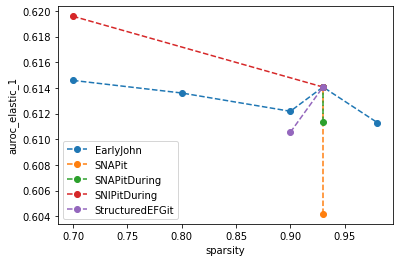

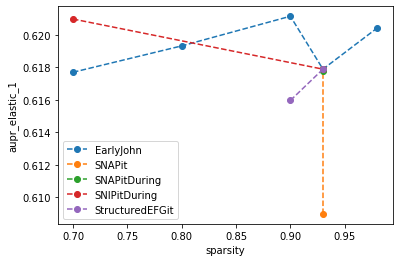

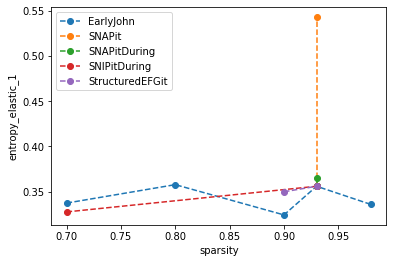

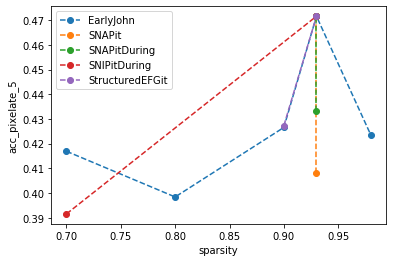

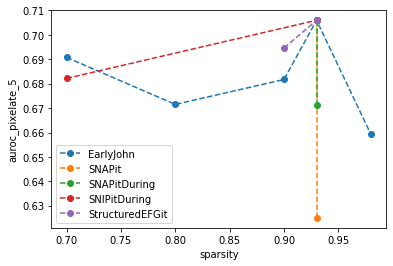

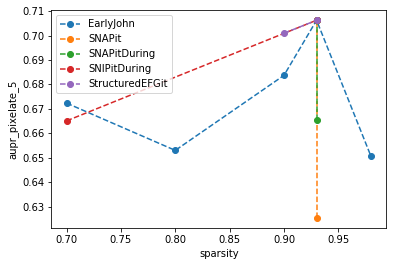

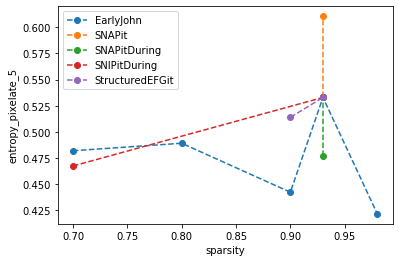

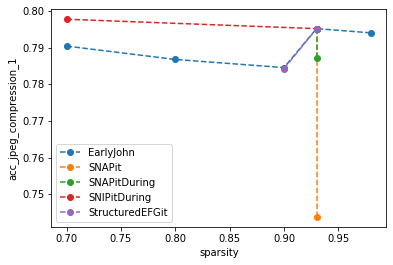

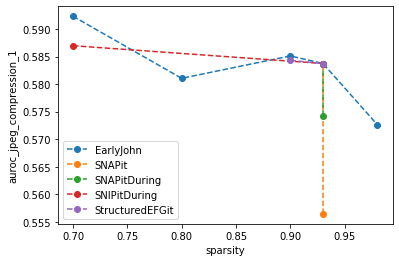

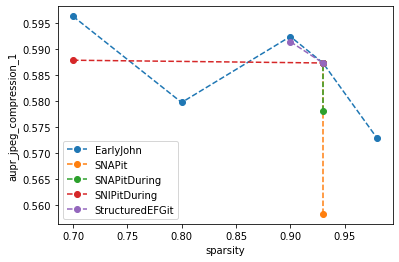

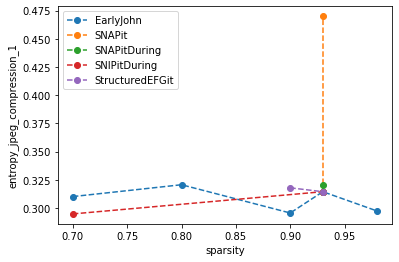

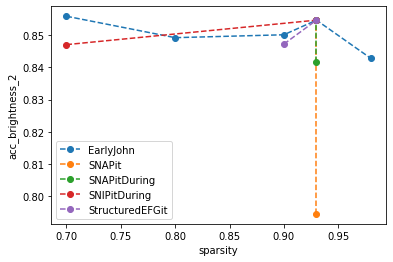

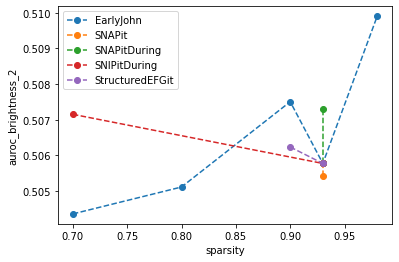

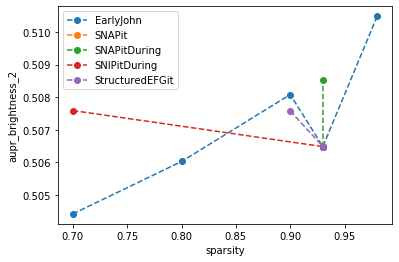

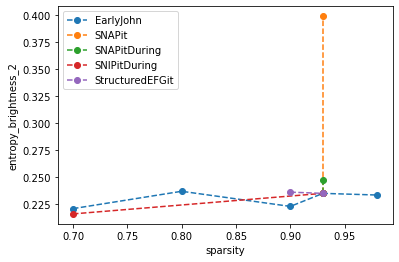

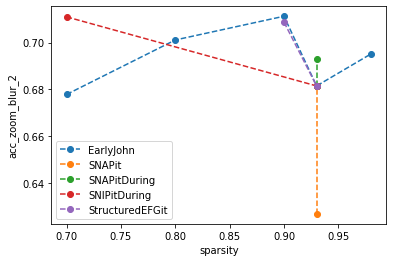

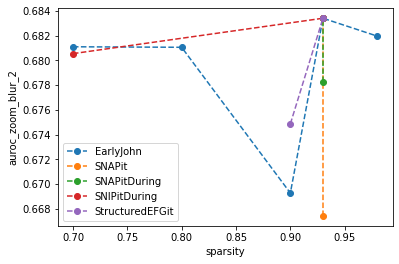

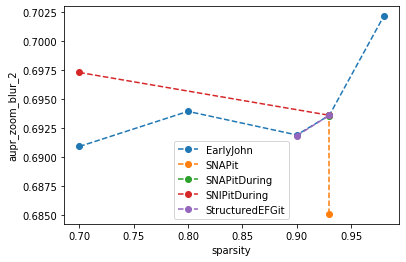

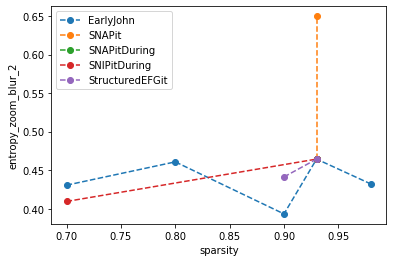

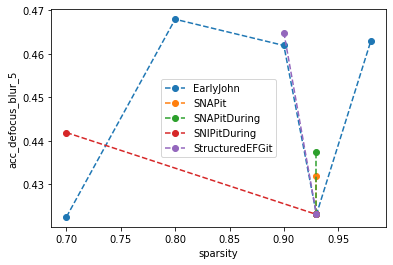

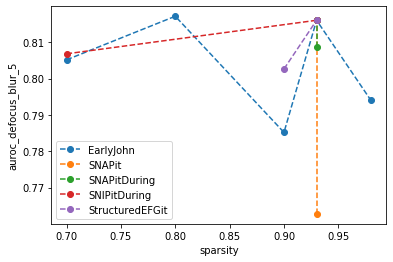

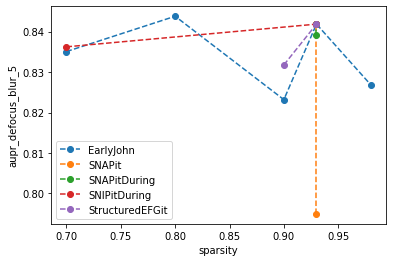

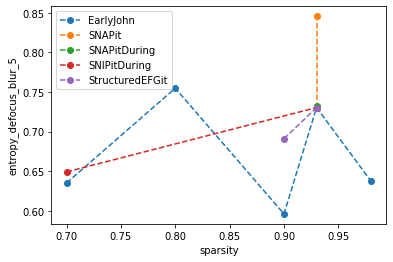

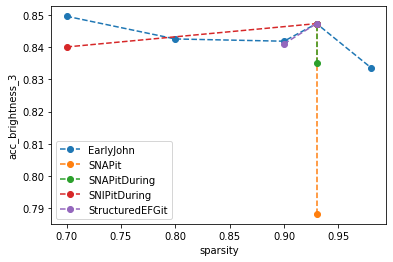

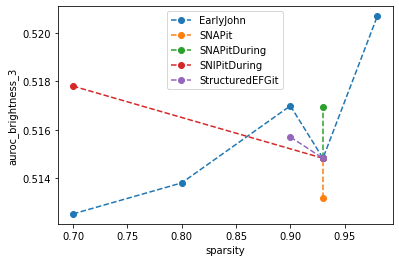

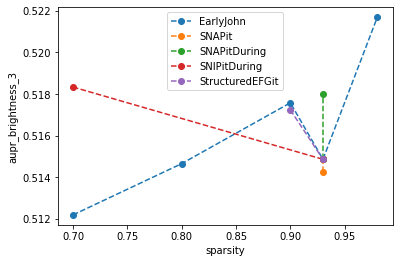

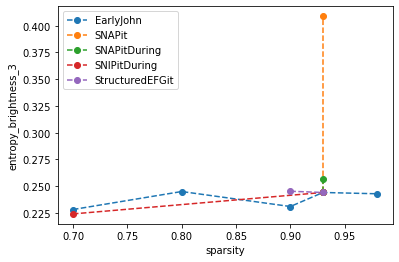

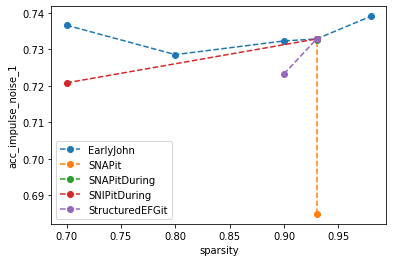

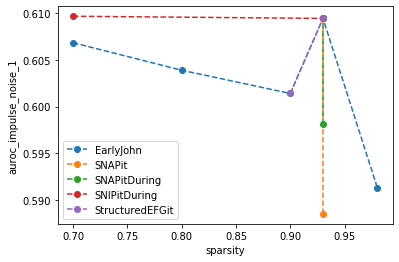

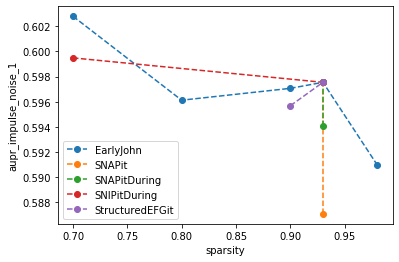

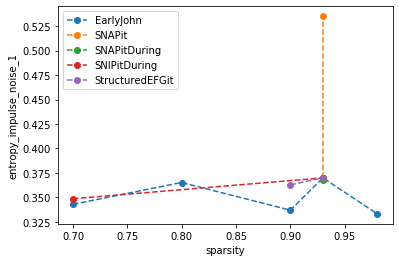

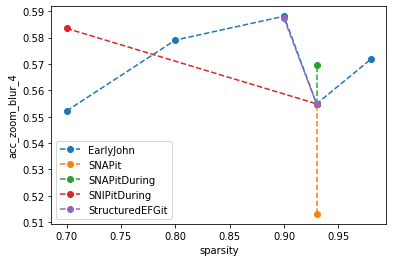

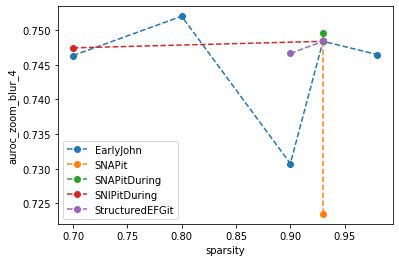

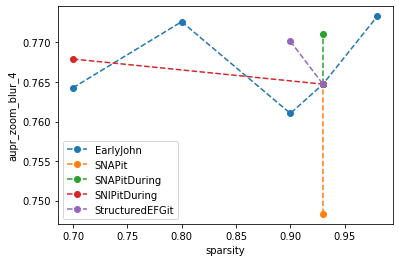

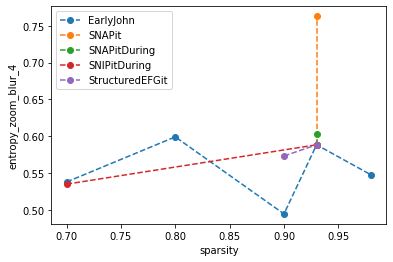

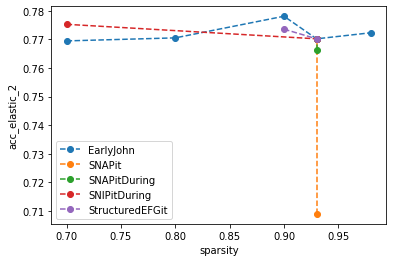

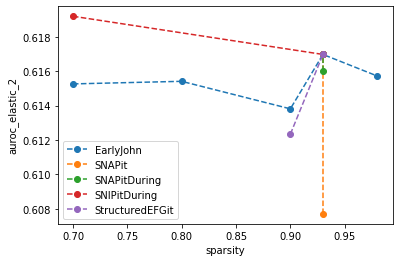

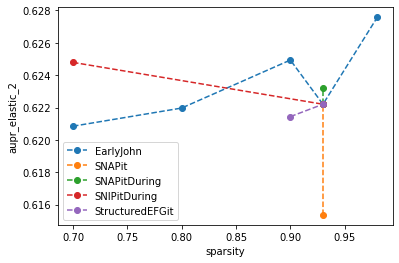

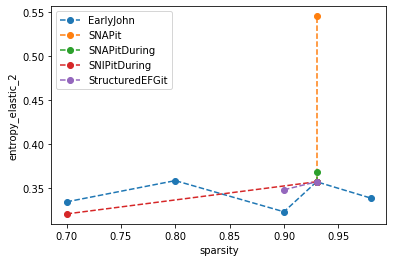

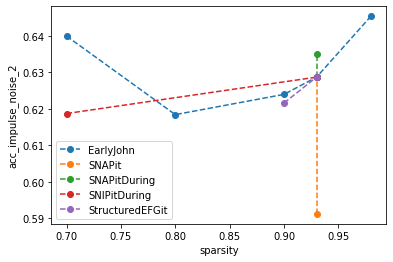

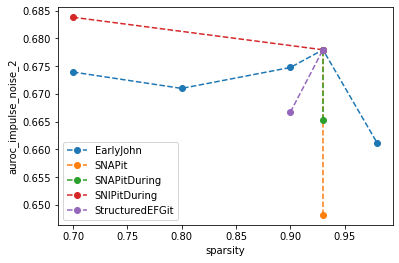

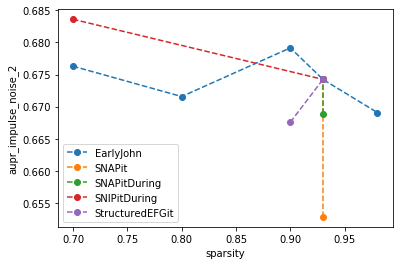

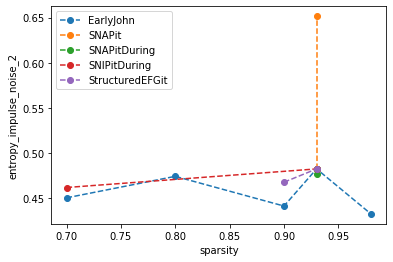

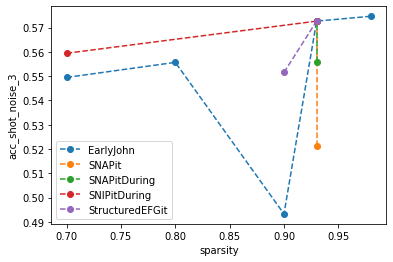

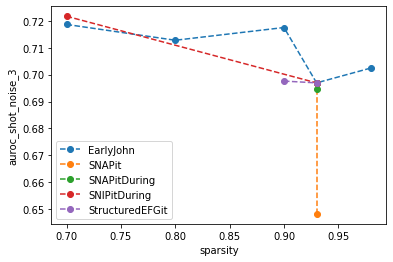

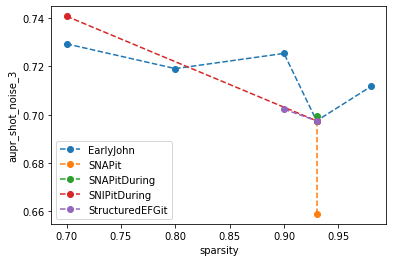

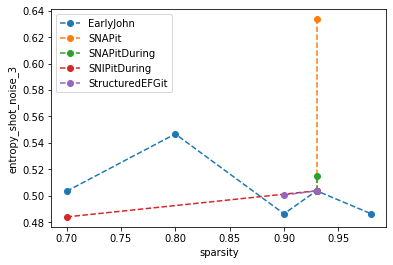

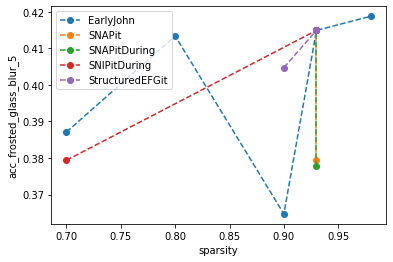

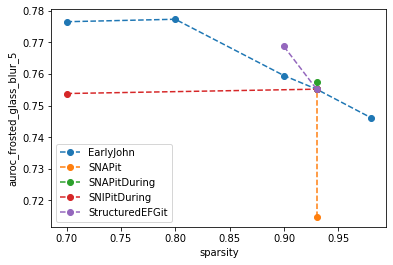

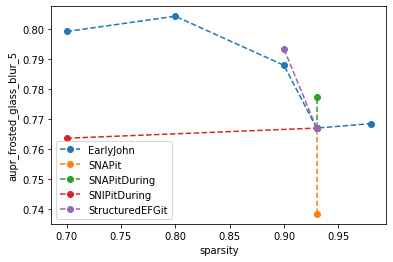

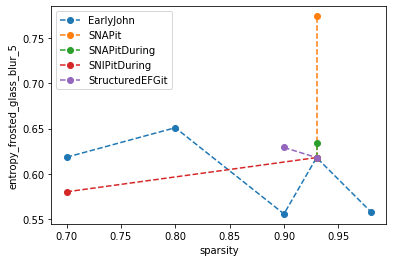

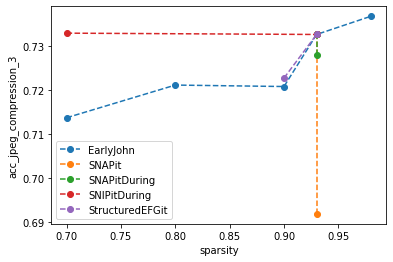

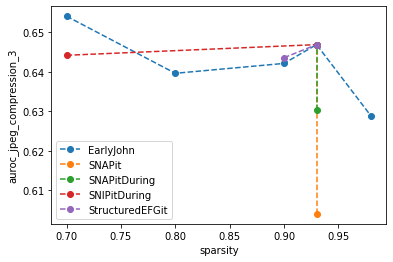

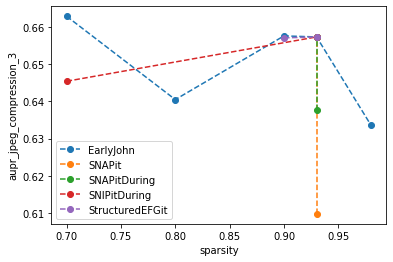

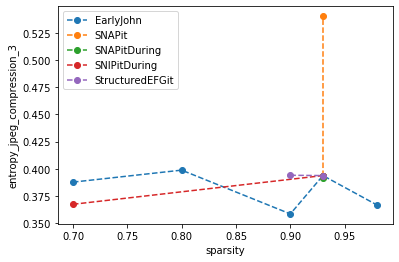

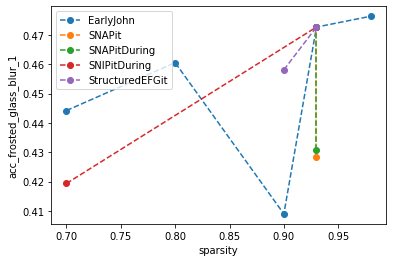

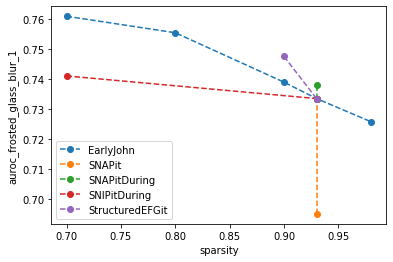

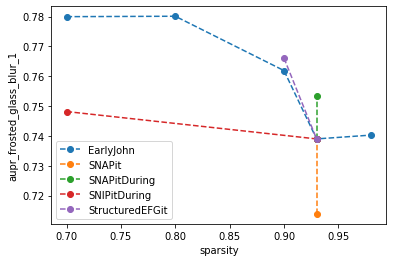

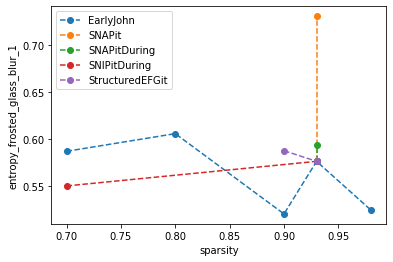

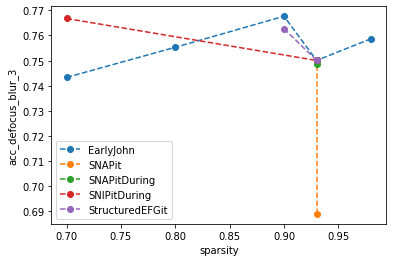

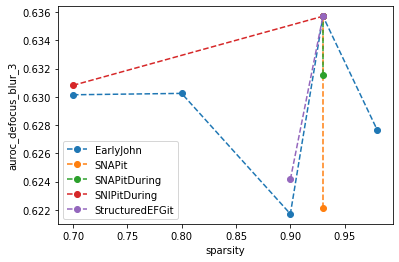

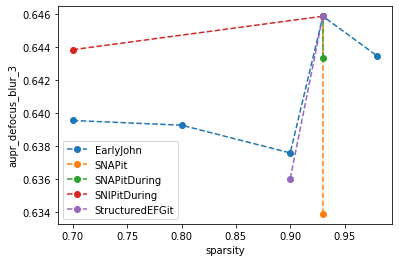

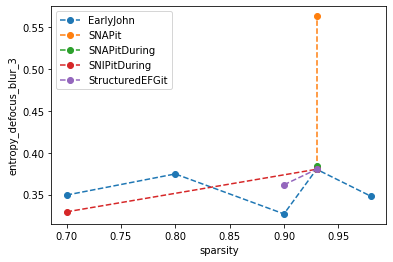

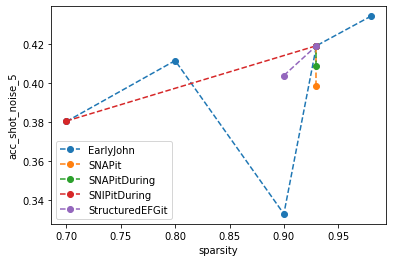

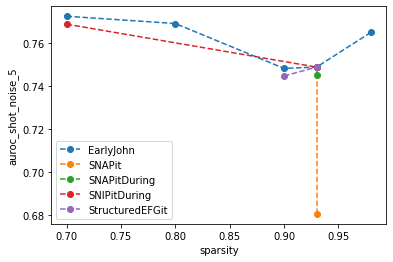

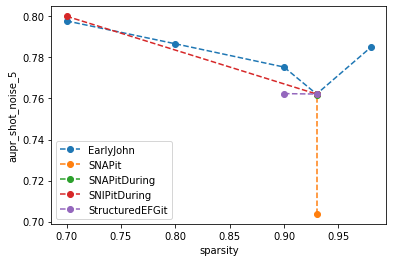

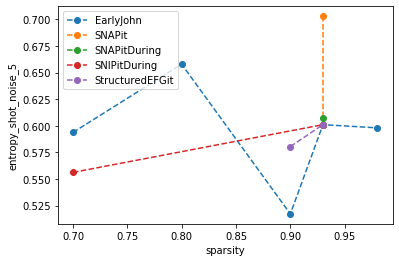

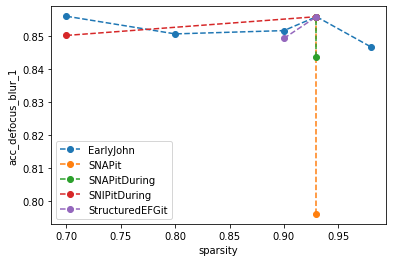

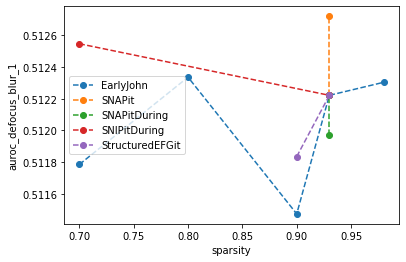

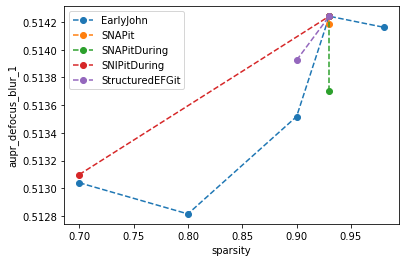

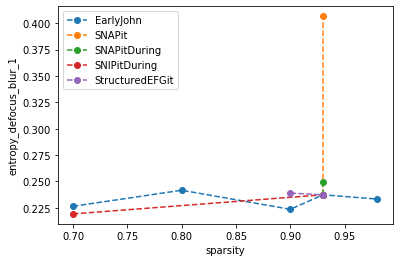

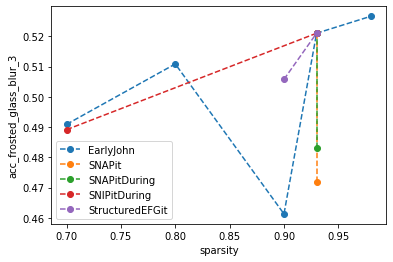

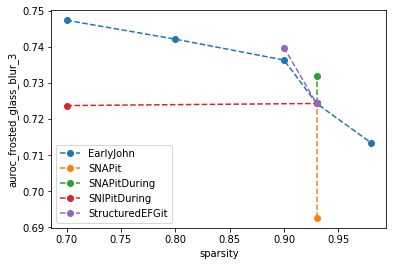

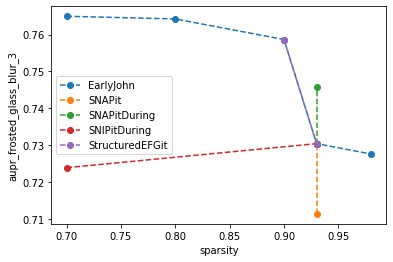

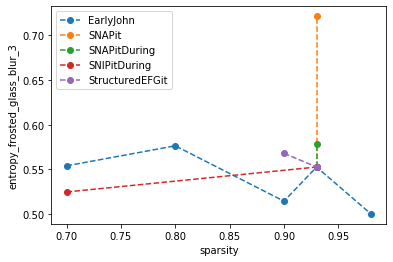

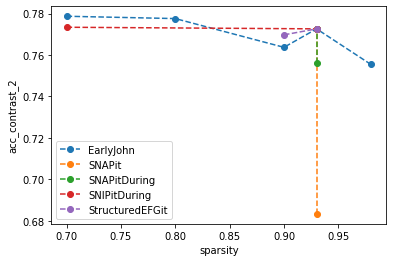

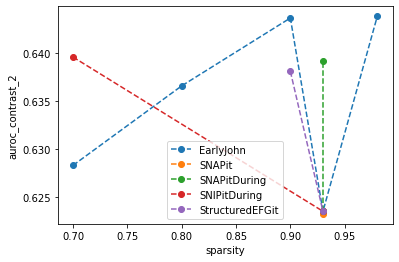

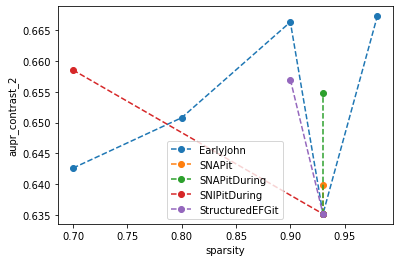

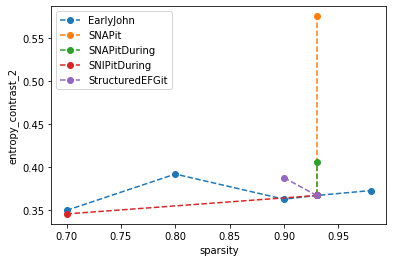

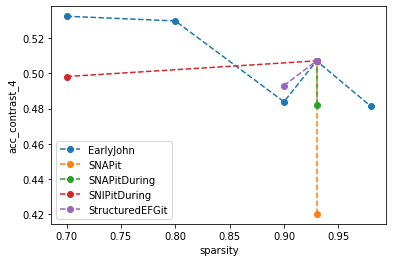

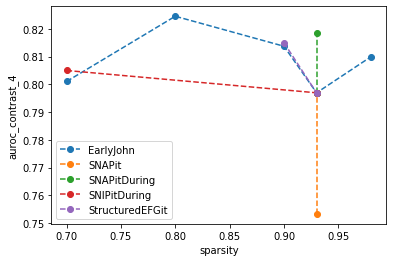

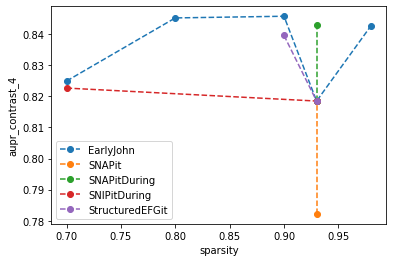

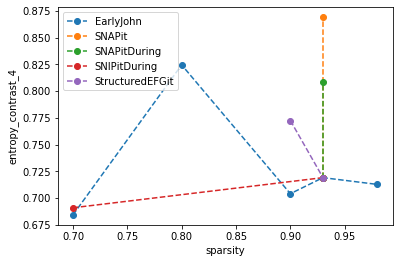

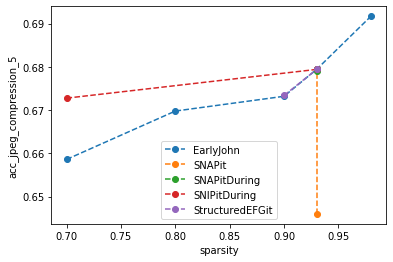

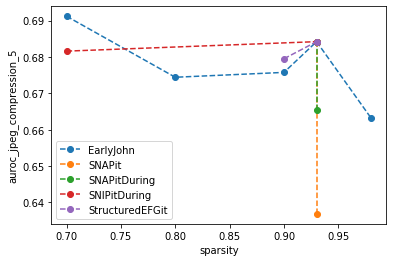

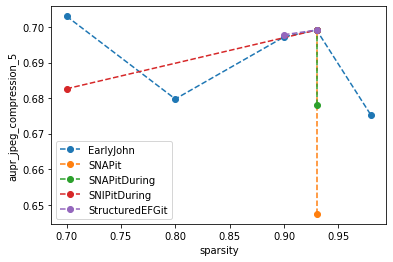

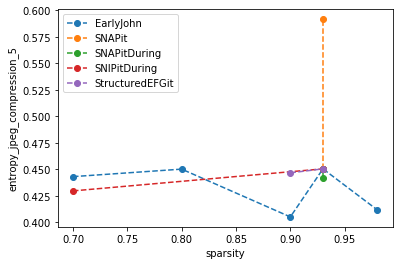

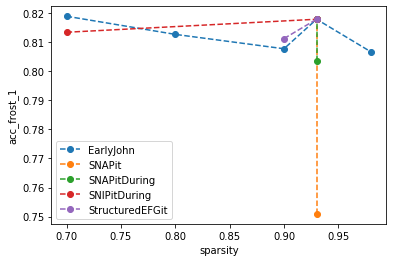

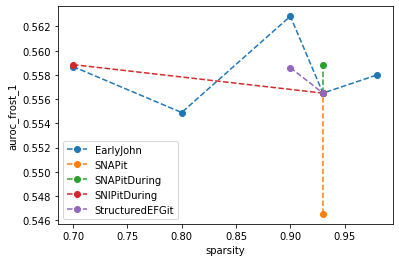

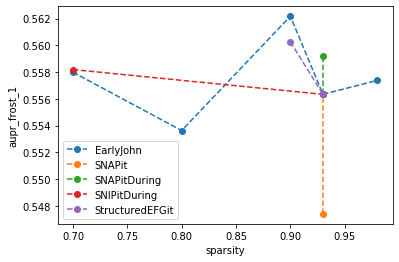

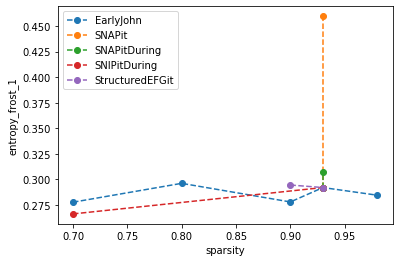

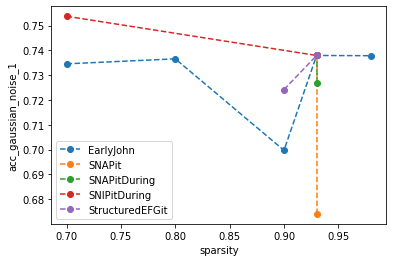

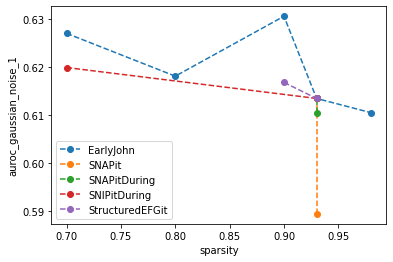

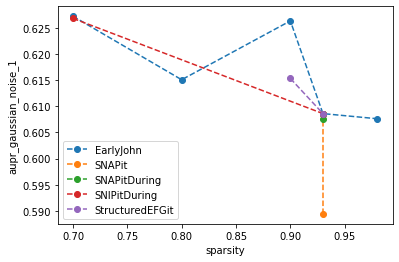

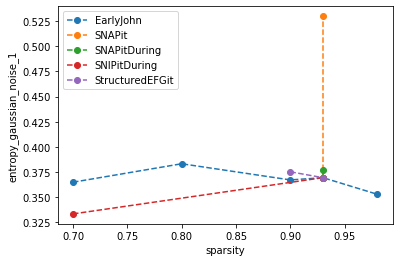

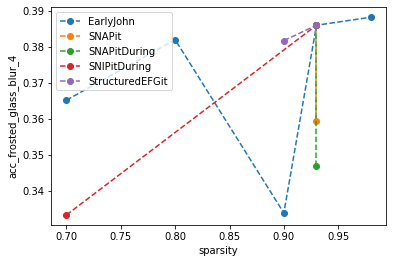

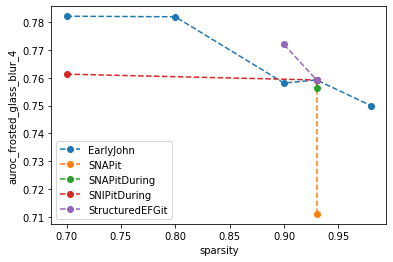

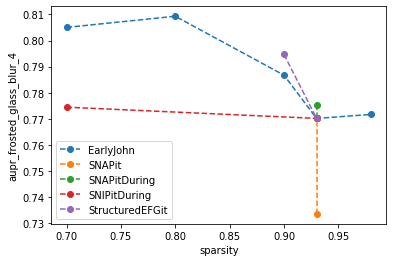

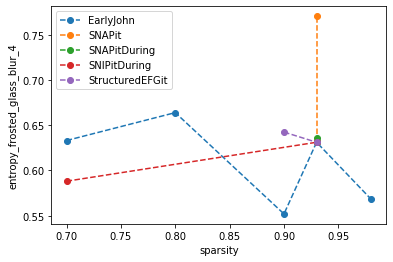

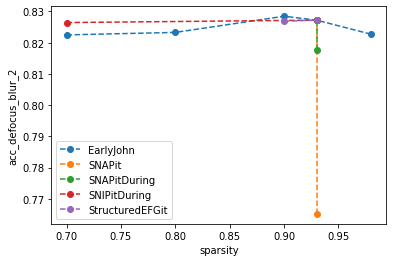

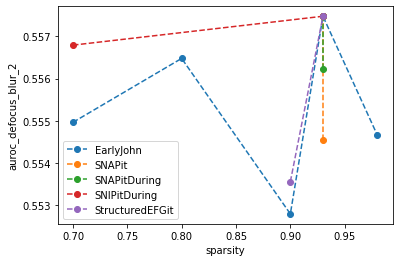

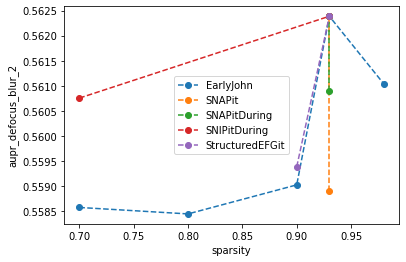

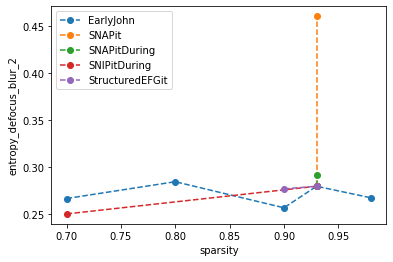

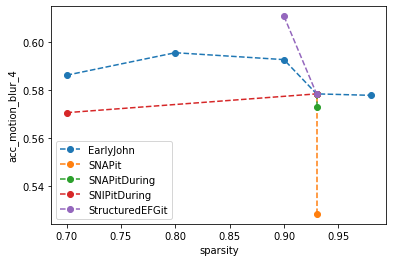

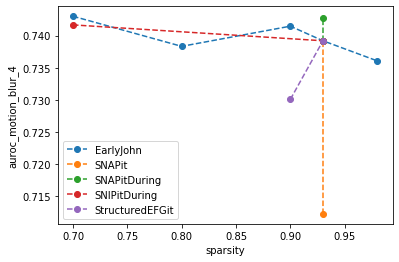

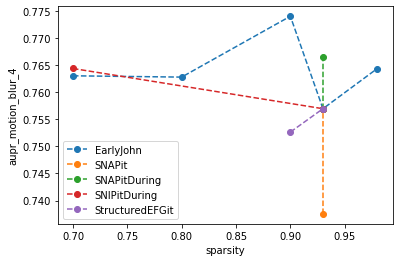

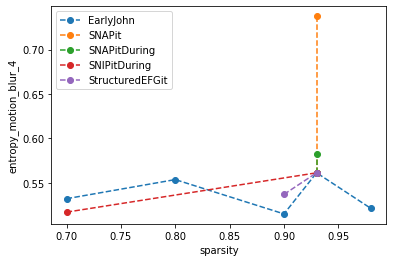

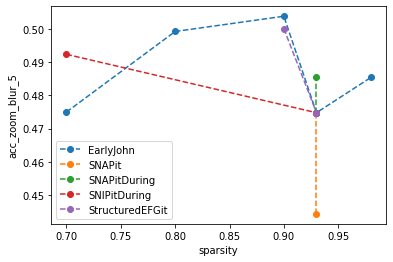

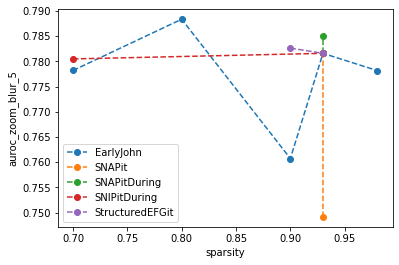

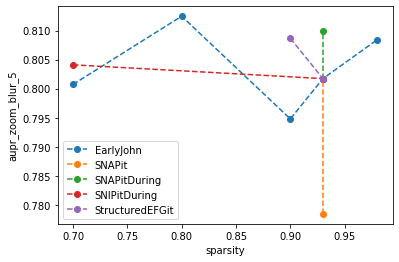

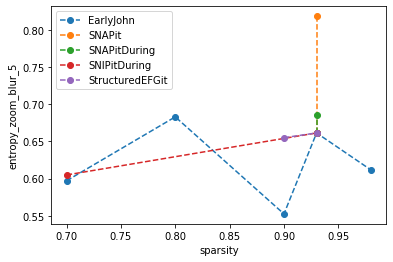

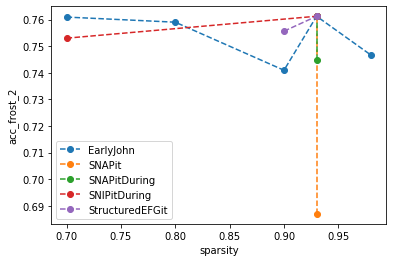

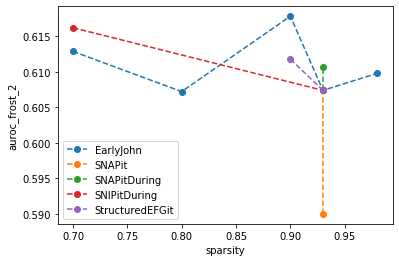

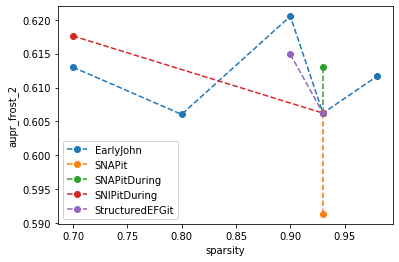

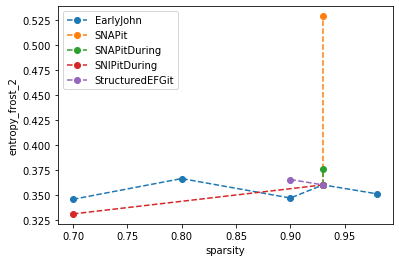

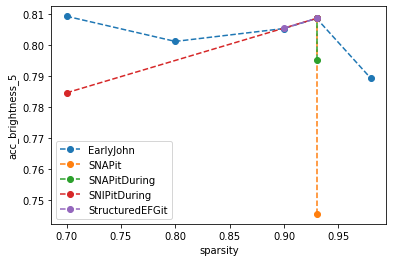

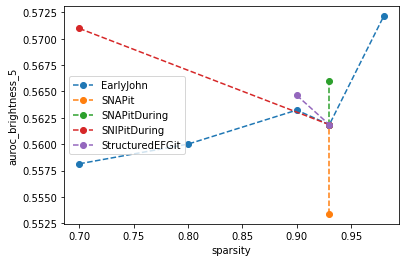

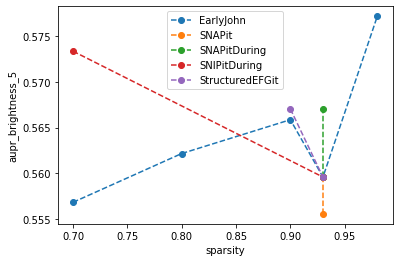

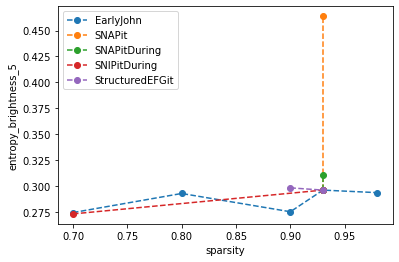

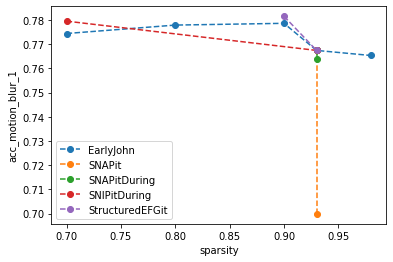

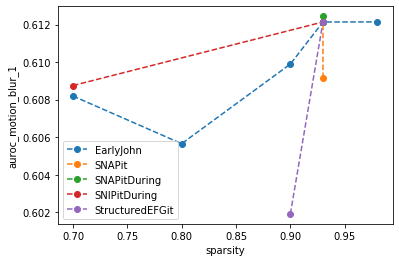

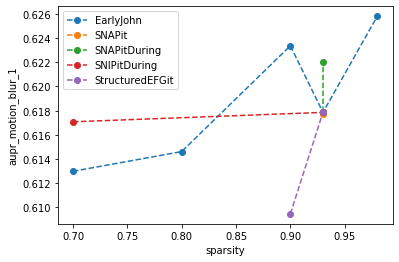

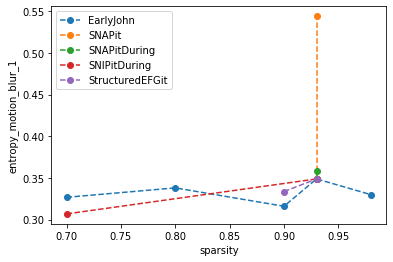

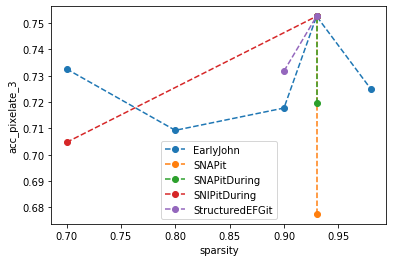

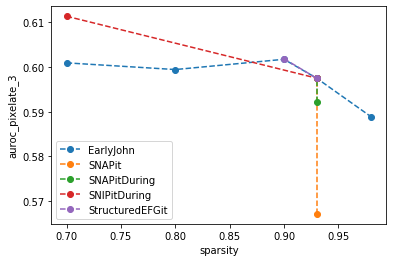

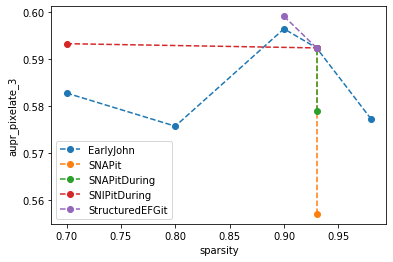

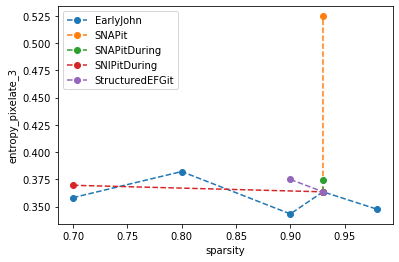

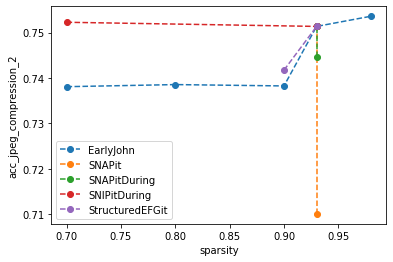

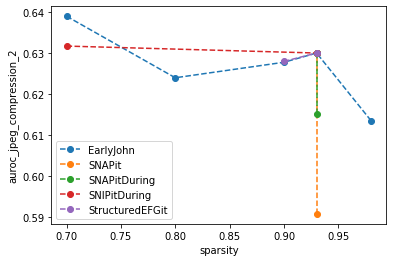

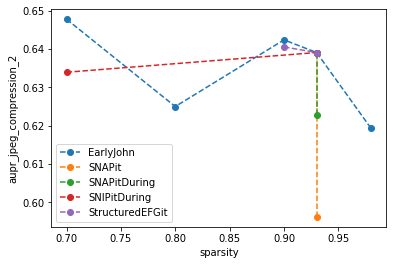

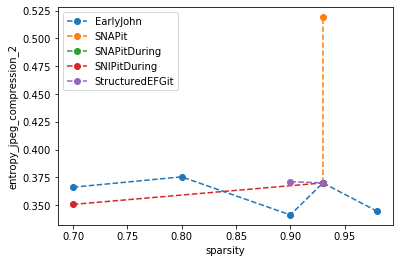

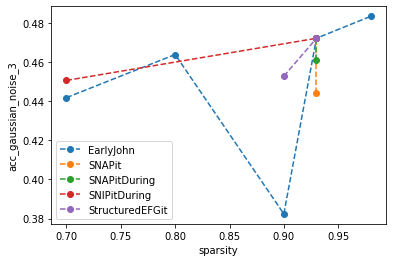

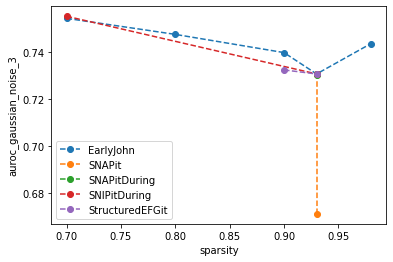

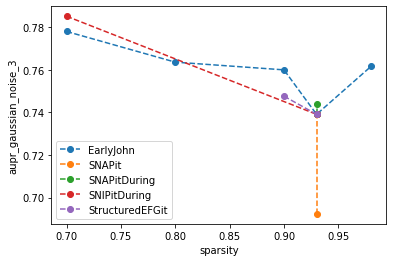

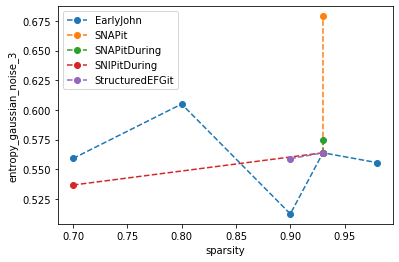

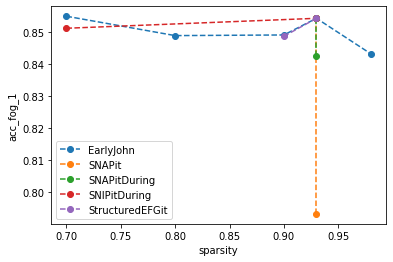

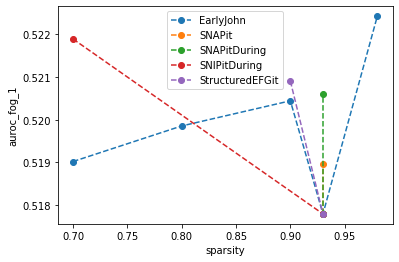

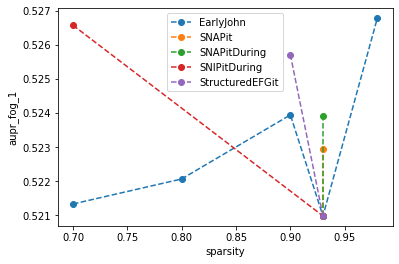

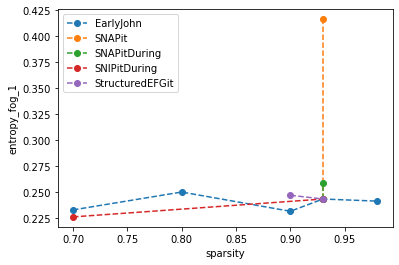

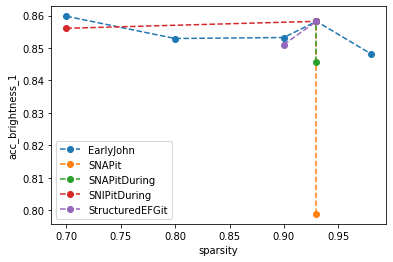

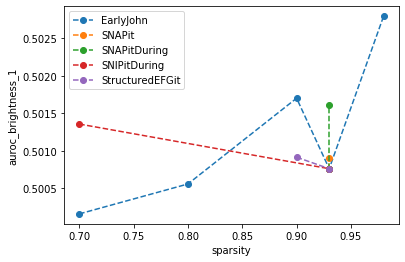

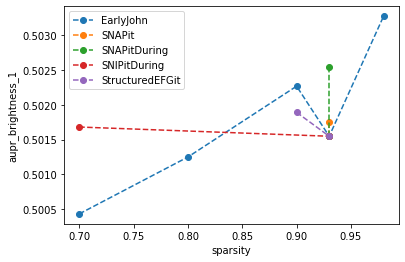

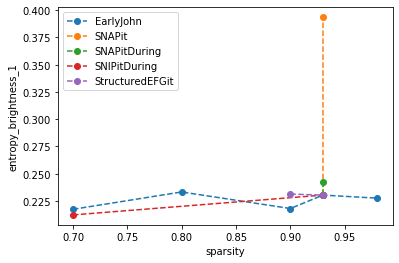

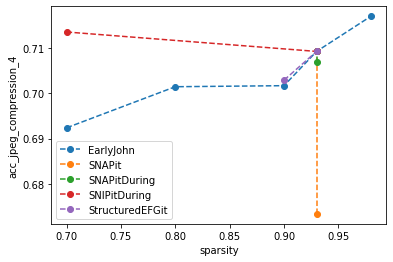

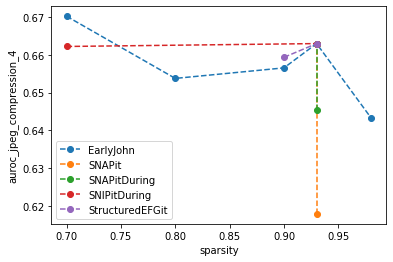

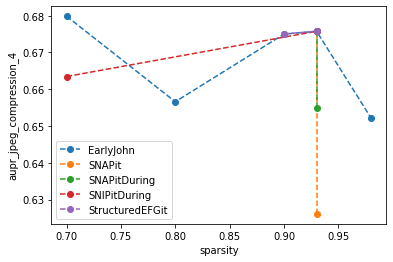

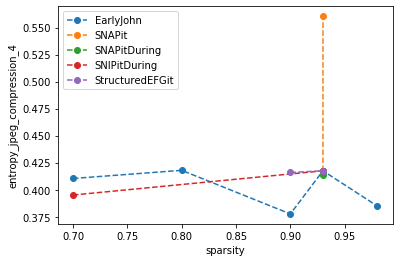

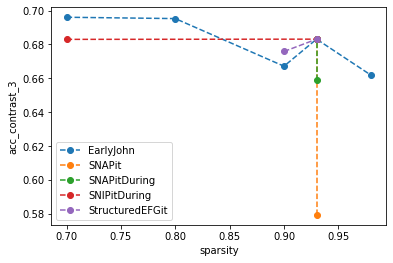

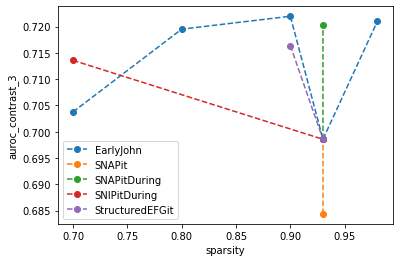

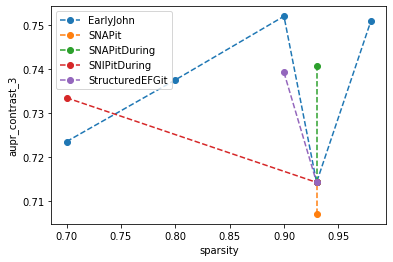

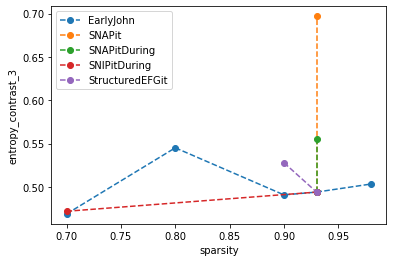

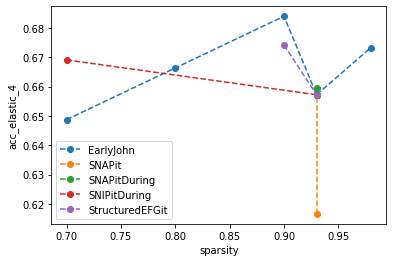

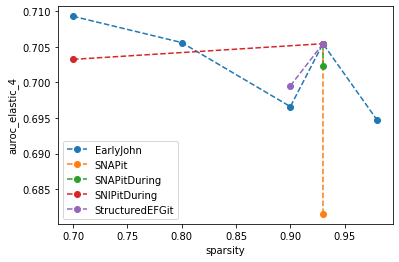

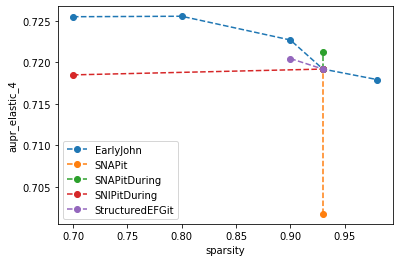

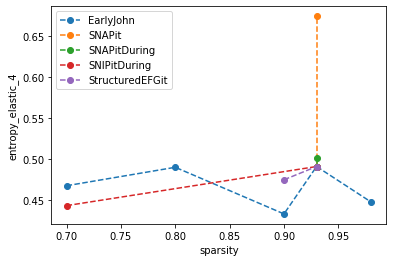

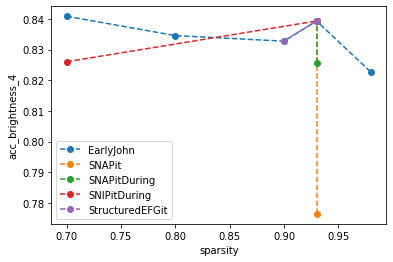

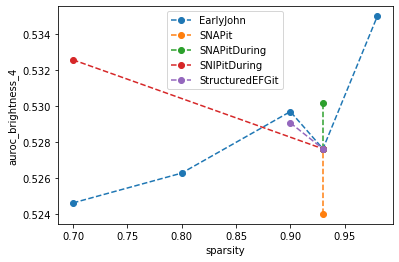

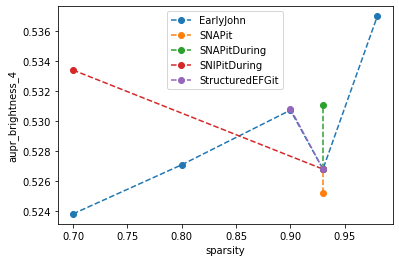

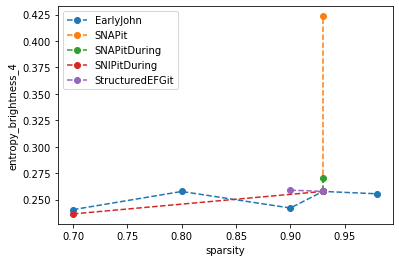

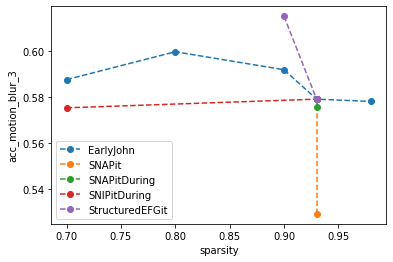

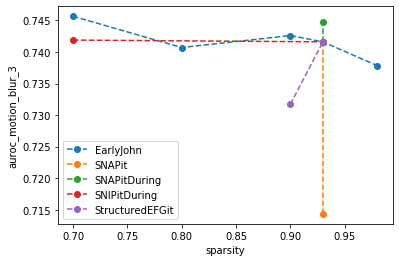

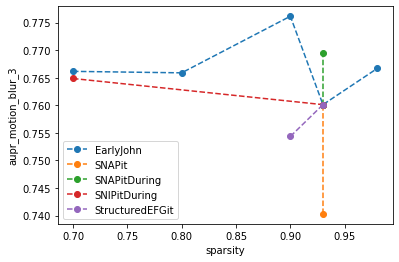

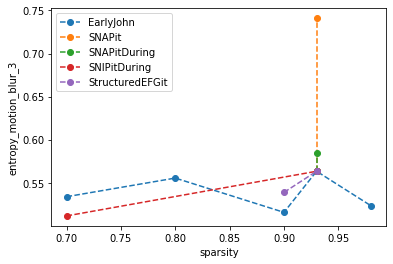

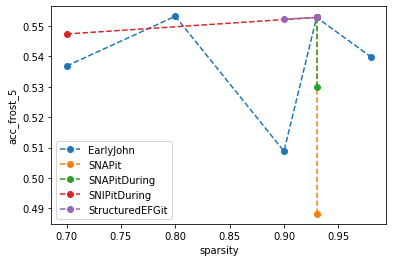

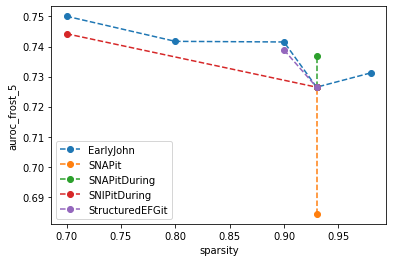

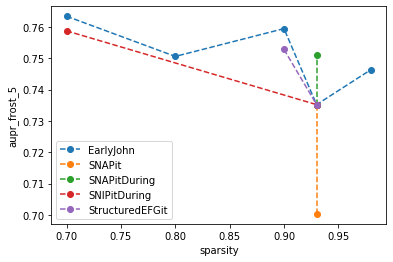

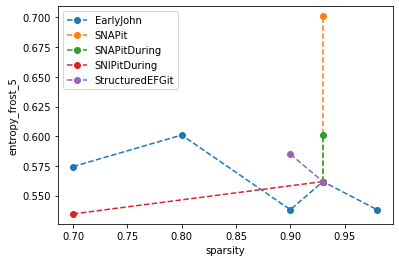

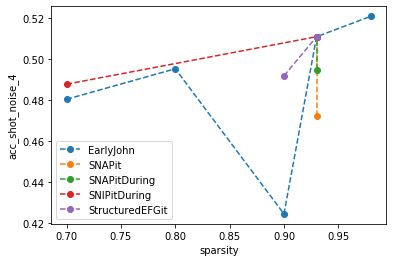

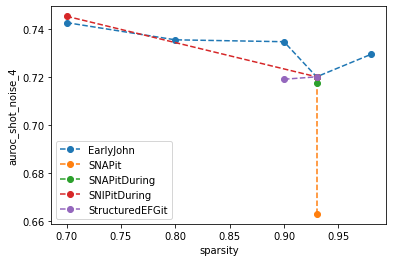

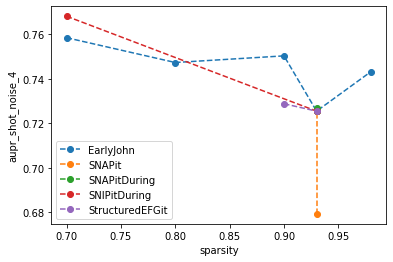

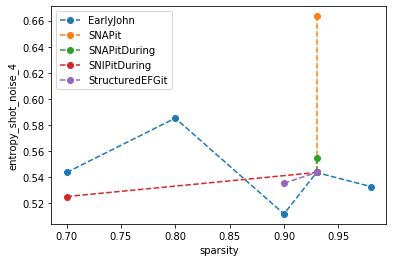

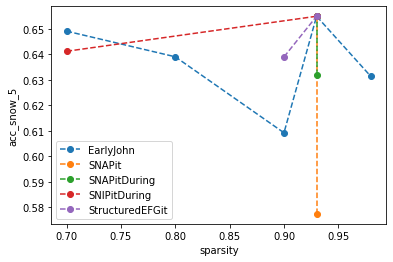

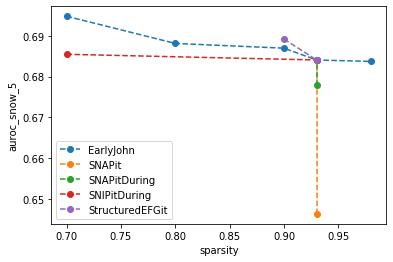

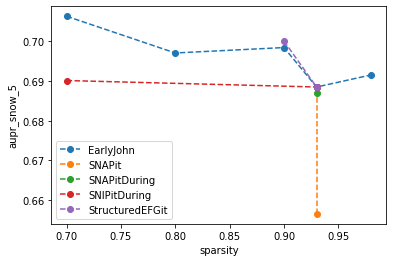

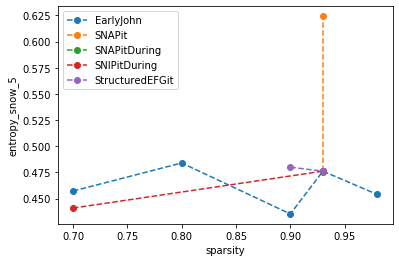

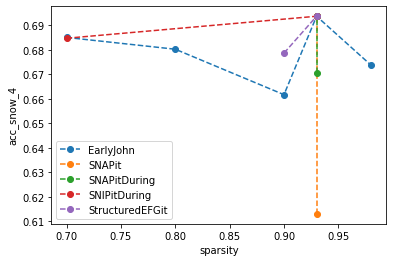

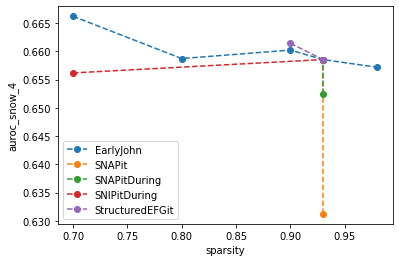

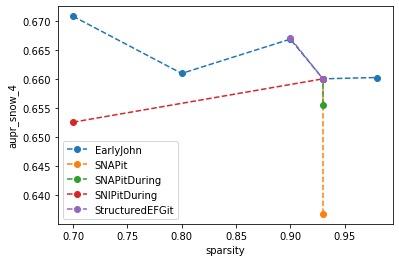

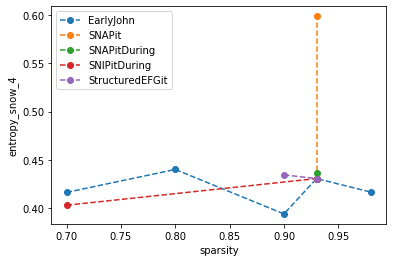

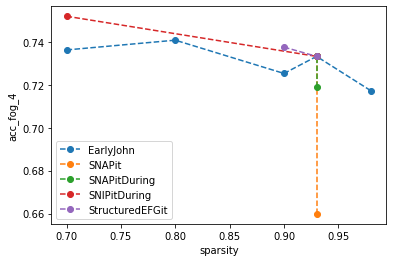

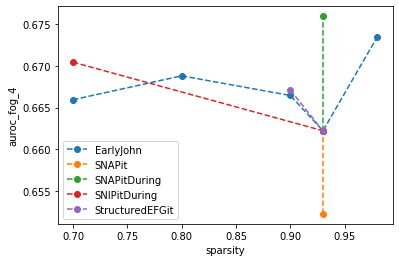

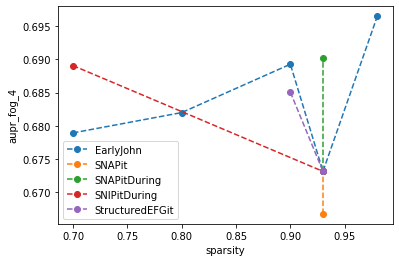

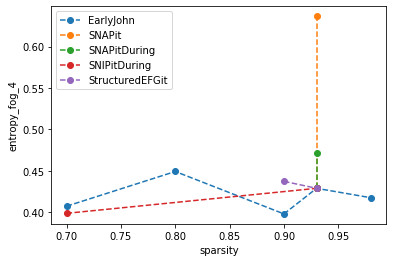

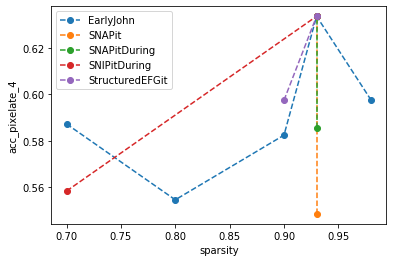

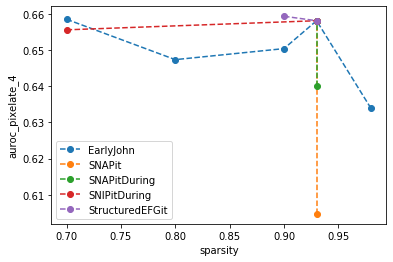

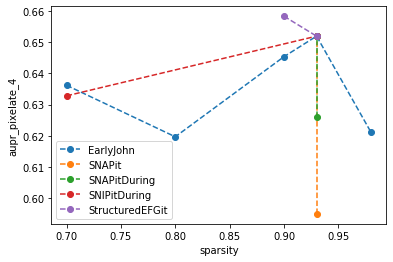

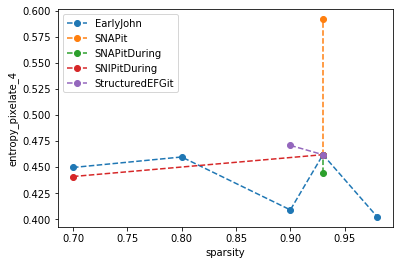

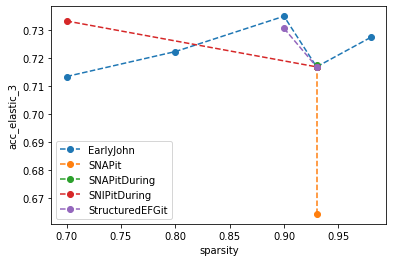

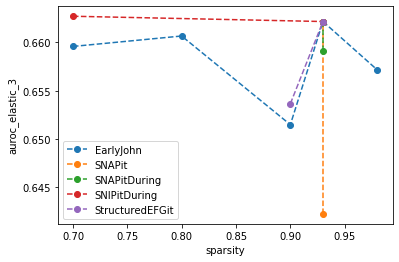

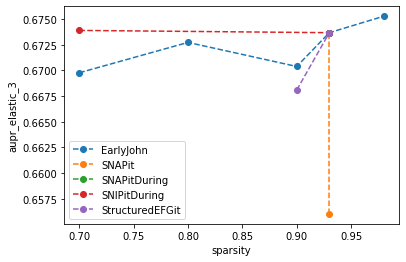

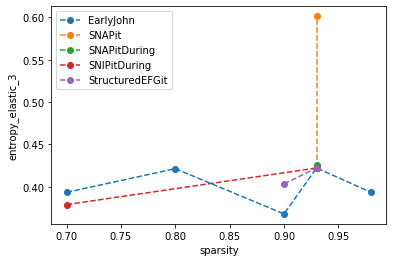

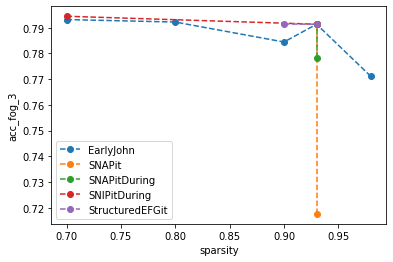

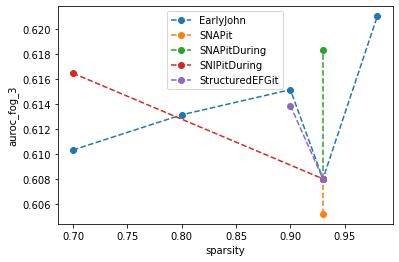

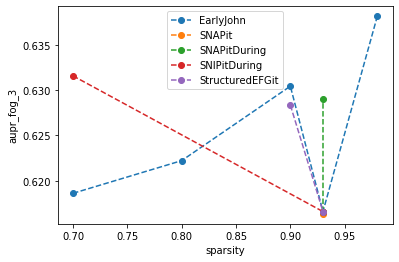

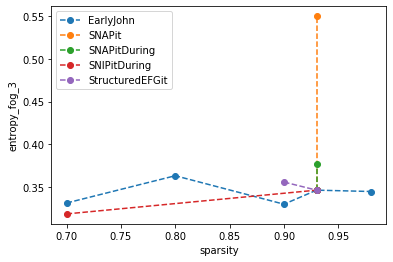

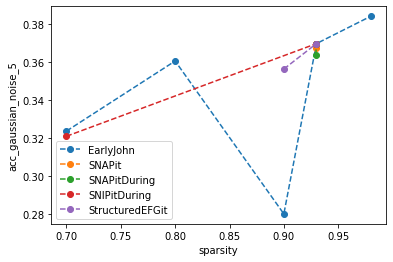

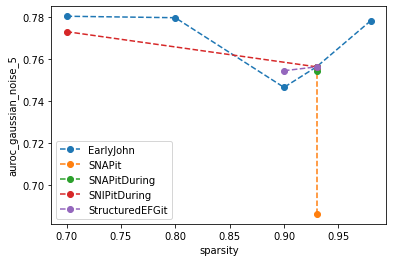

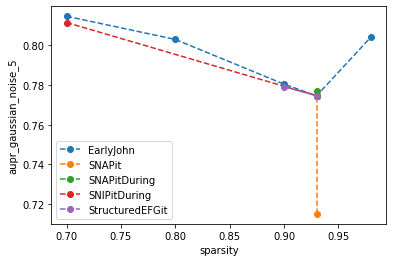

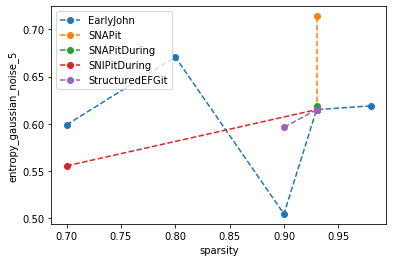

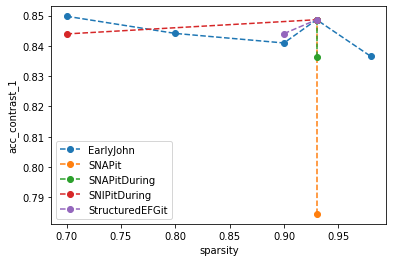

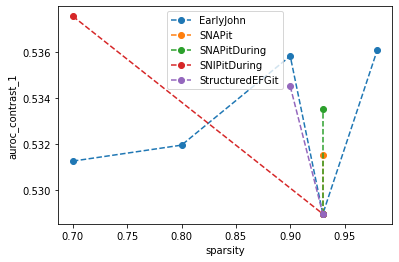

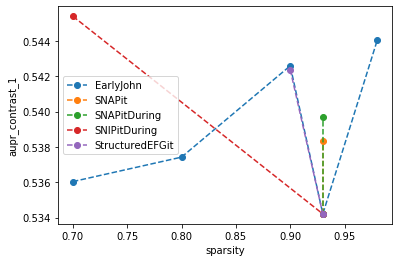

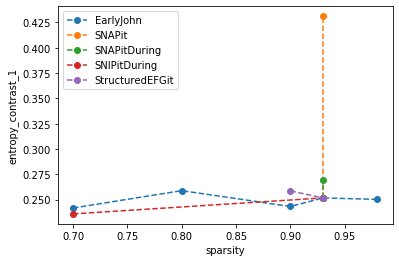

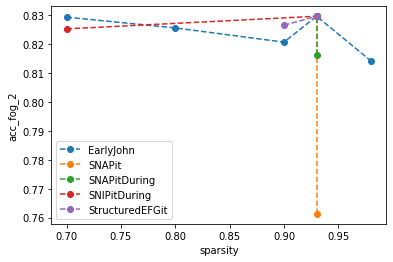

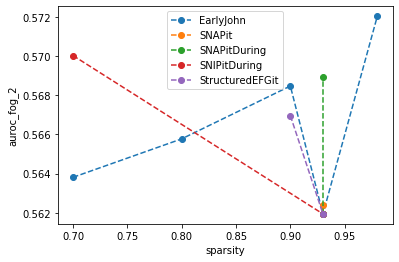

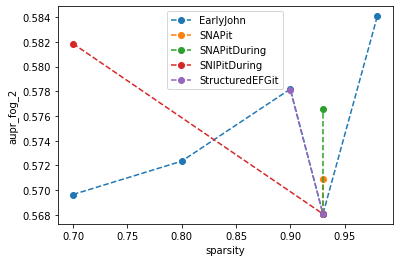

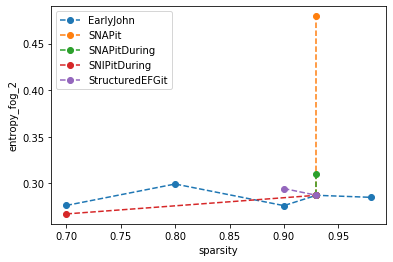

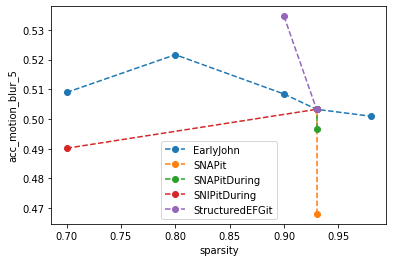

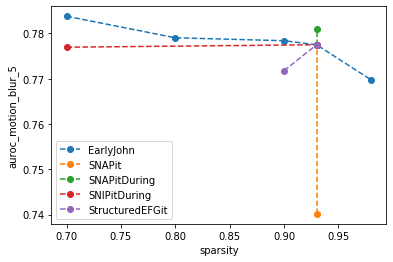

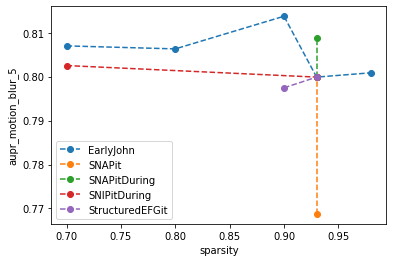

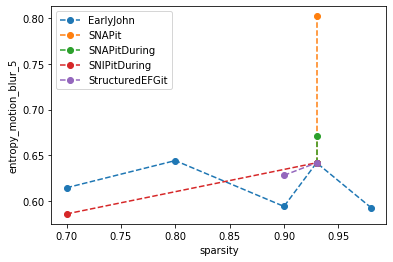

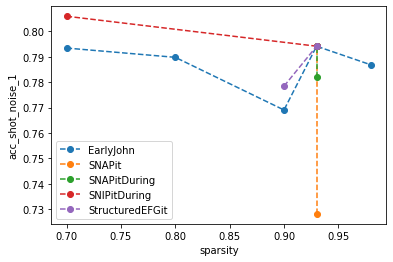

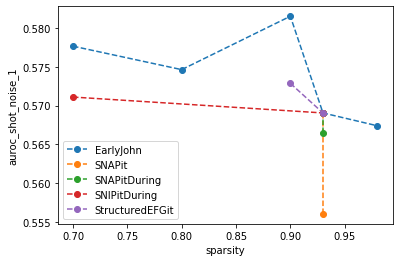

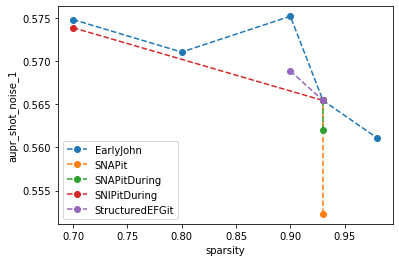

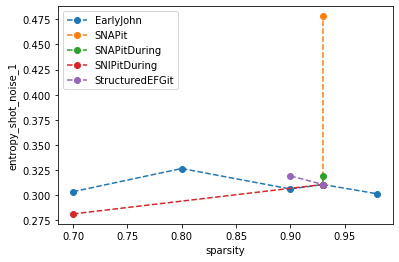

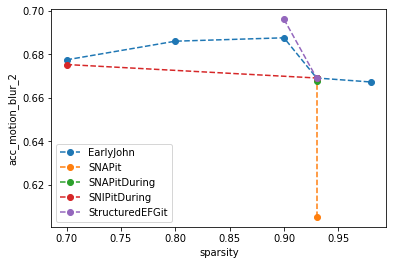

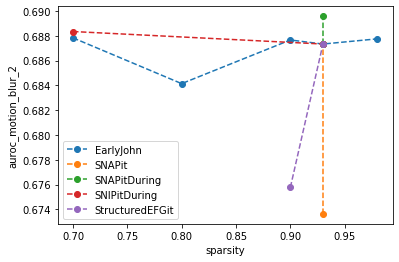

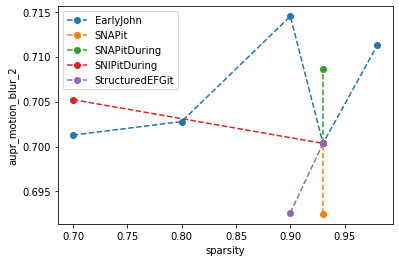

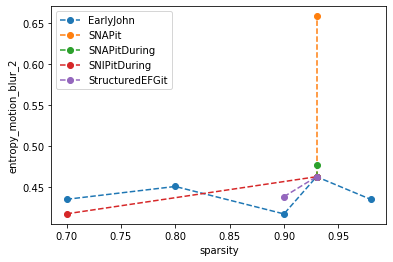

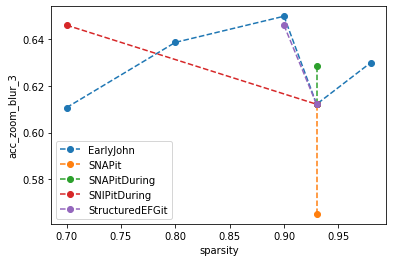

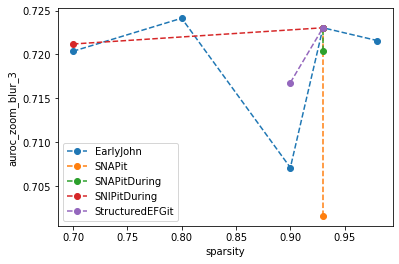

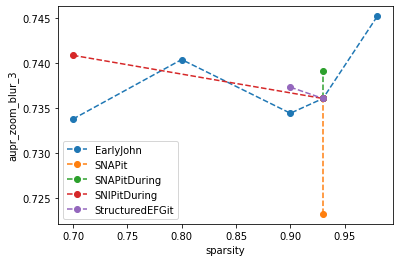

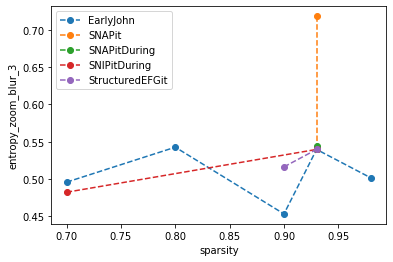

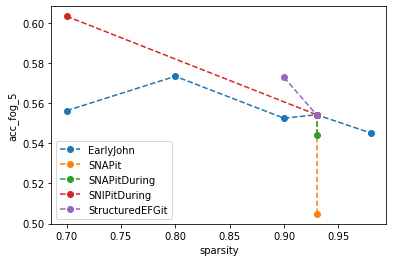

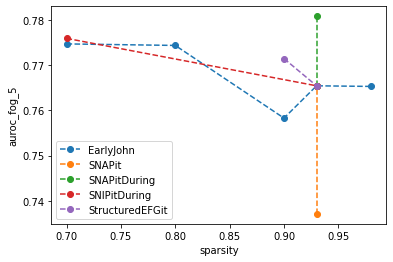

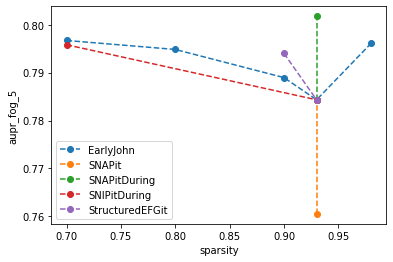

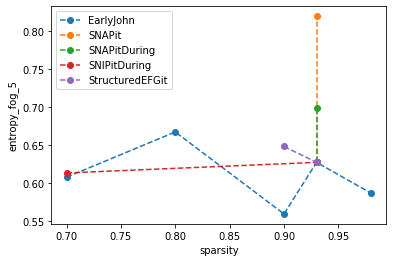

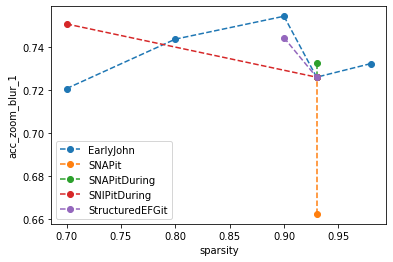

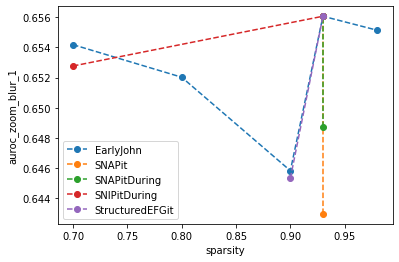

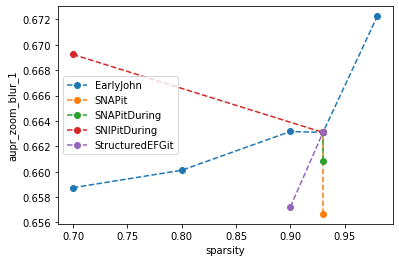

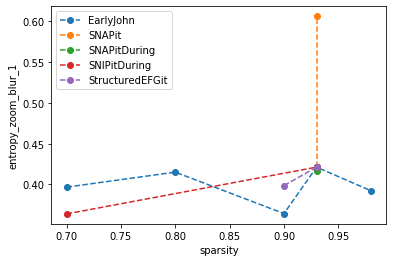

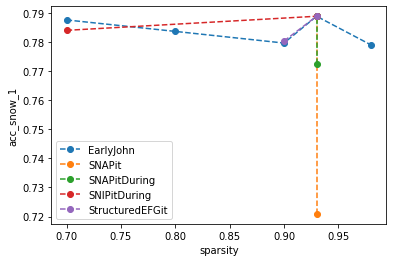

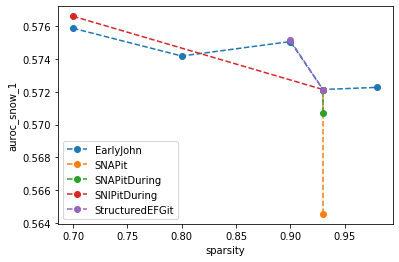

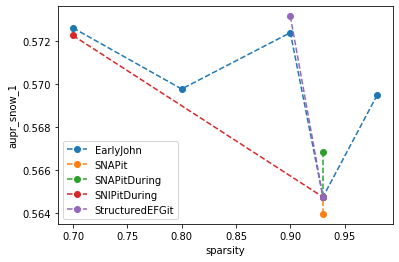

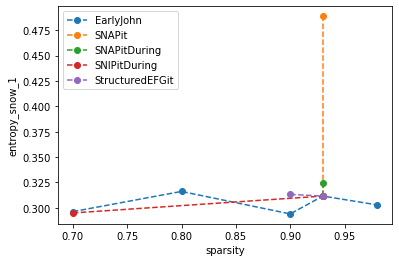

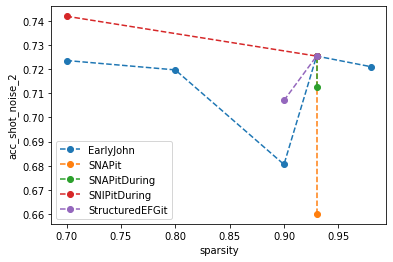

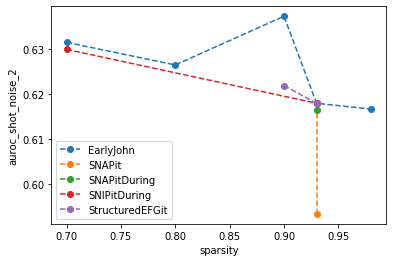

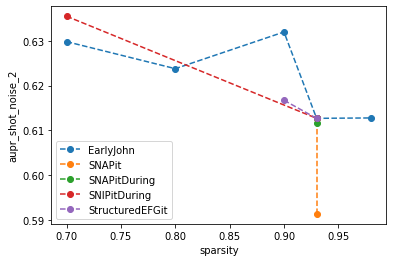

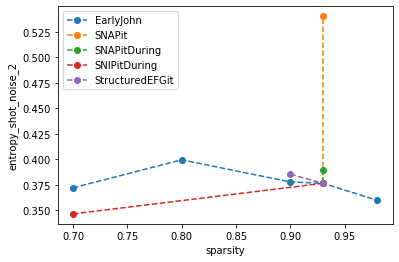

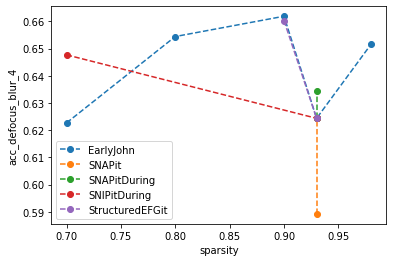

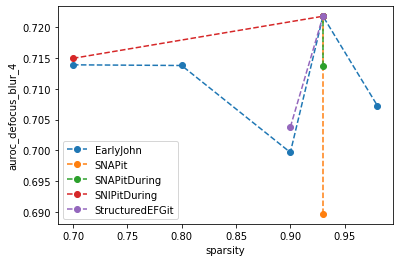

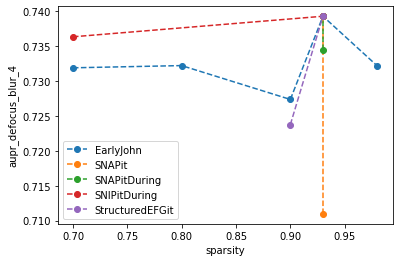

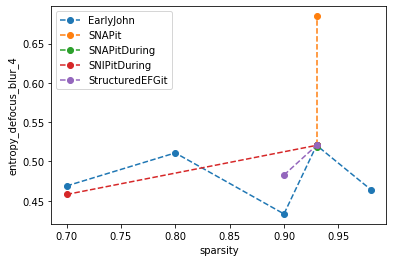

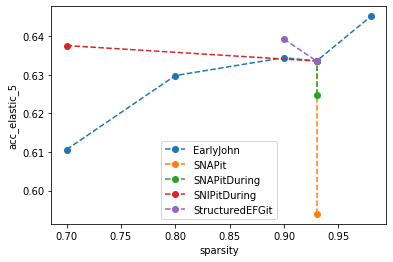

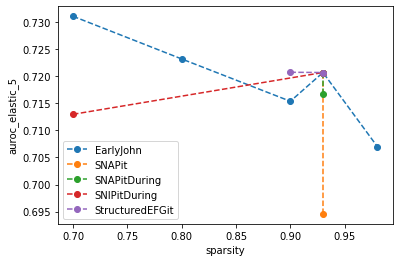

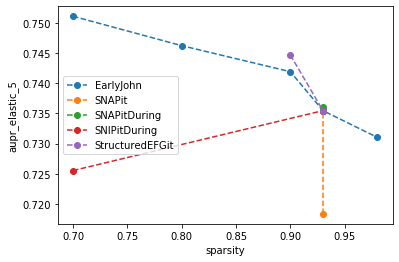

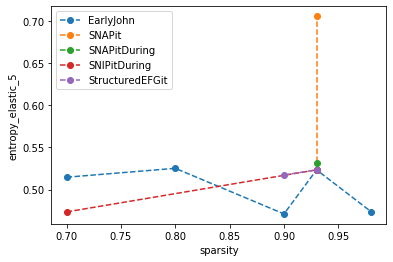

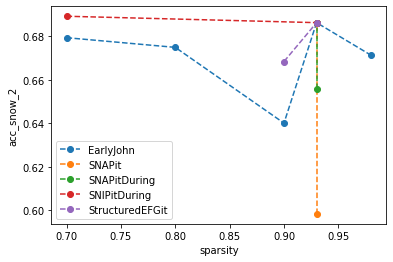

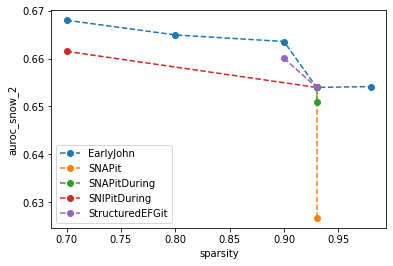

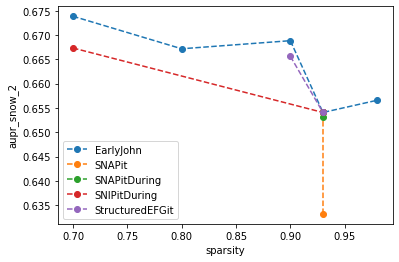

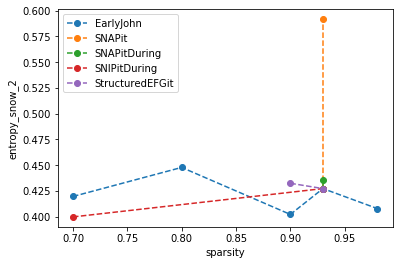

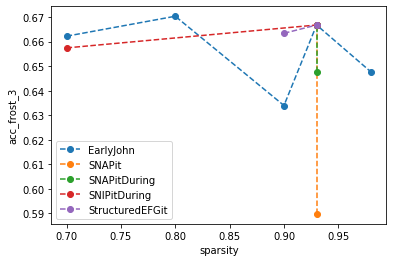

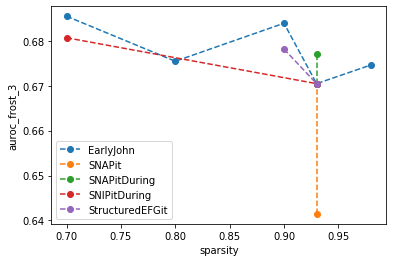

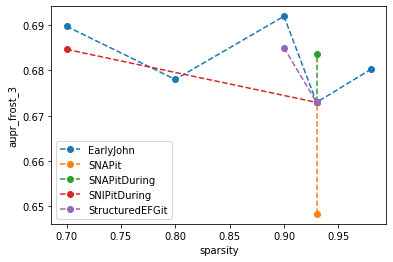

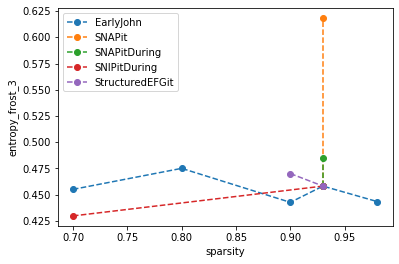

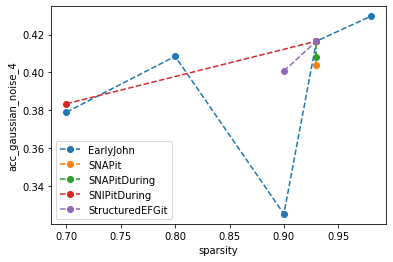

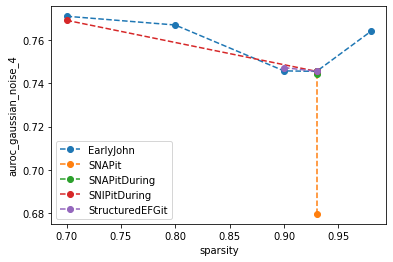

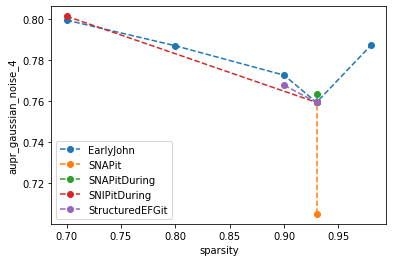

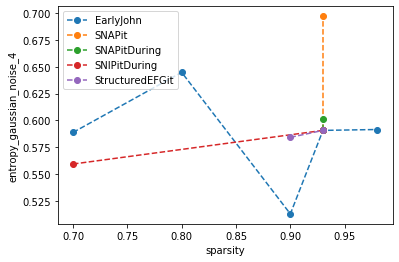

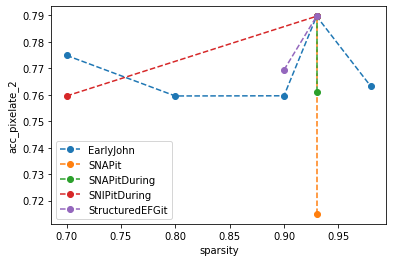

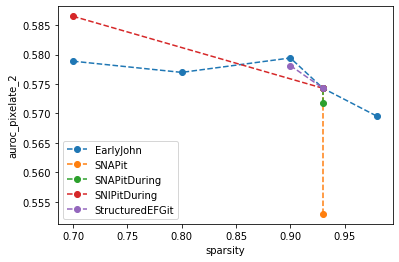

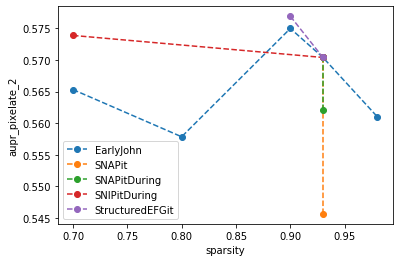

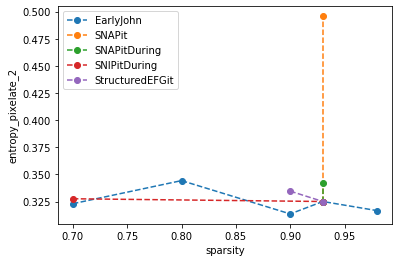

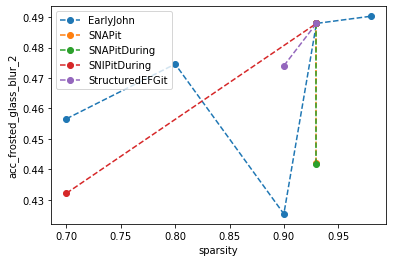

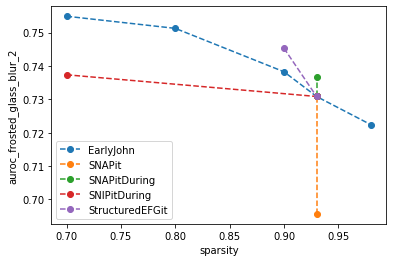

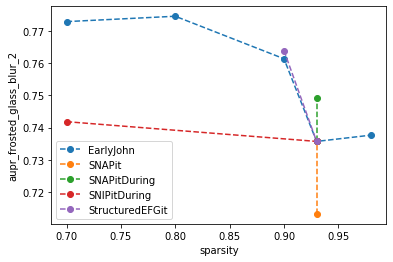

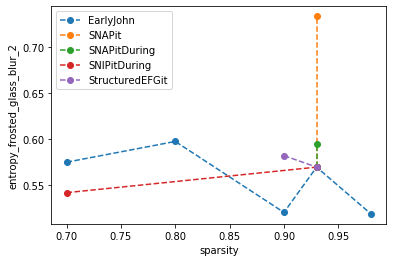

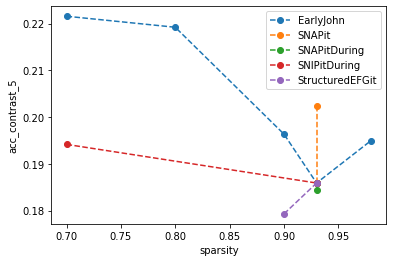

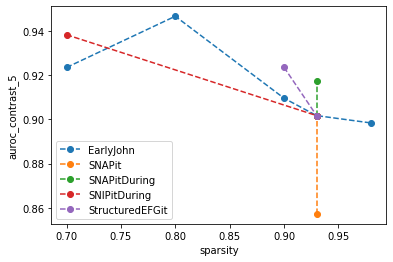

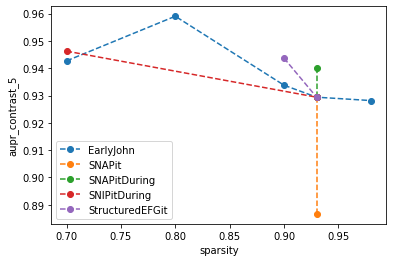

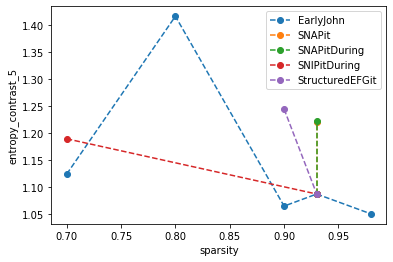

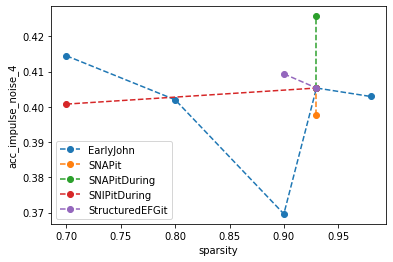

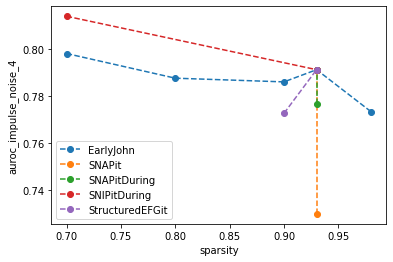

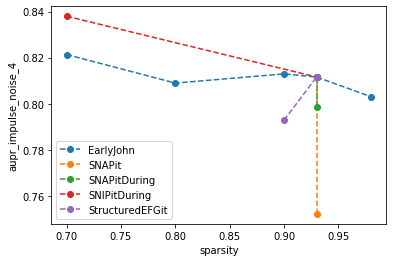

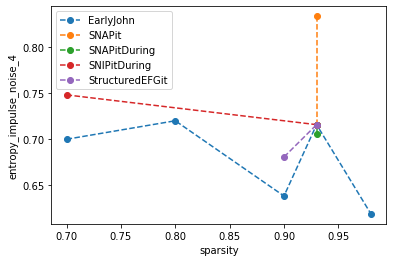

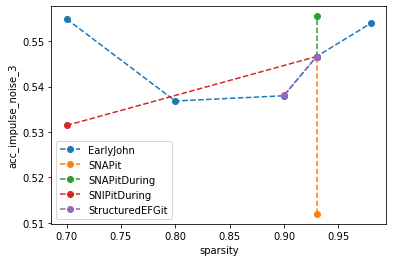

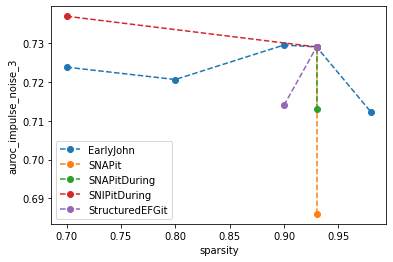

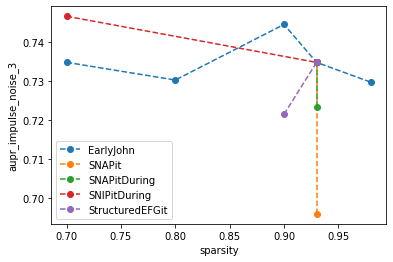

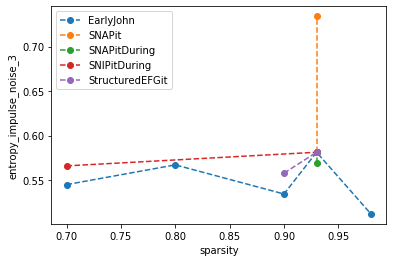

In [9]:
for col in results.columns:
    if col.startswith("result"):
        for crit in criterions:
            subset = results[(results["config.arguments.train_scheme"] == "DefaultTrainer") &
                       ((results["config.arguments.prune_criterion"] == crit) |
                       (results["config.arguments.prune_criterion"] == "EmptyCrit"))]
            limit = subset["config.arguments.pruning_limit"].tolist()
            plt.plot(sorted(limit), [x for _, x in sorted(zip(limit, subset[col]))], linestyle='--', marker='o', label=crit)
        plt.xlabel("sparsity")
        plt.ylabel(col.split('.')[-1])
        plt.legend()
        plt.show()